In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 5.6 MB/s 
     |████████████████████████████████| 930 kB 55.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [12]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.formula.api import ols, logit
from statsmodels.api import qqplot
pd.options.display.float_format = '{:,.3f}'.format
pd.options.mode.chained_assignment = None
sns.set()

### **Which one is the response variable?**

Regression lets you predict the values of a response variable from known values of explanatory variables. Which variable you use as the response variable depends on the question you are trying to answer, but in many datasets, there will be an obvious choice for variables that would be interesting to predict. Over the next few exercises, you'll explore a Taiwan real estate dataset with four variables.

```
Variable	                              Meaning
dist_to_mrt_station_m	                Distance to nearest MRT metro station, in meters.
n_convenience	                        No. of convenience stores in walking distance.
house_age_years	                      The age of the house, in years, in three groups.
price_twd_msq	                        House price per unit area, in New Taiwan dollars per meter squared.
```
Print `taiwan_real_estate` in the console to view the dataset, and decide which variable would make a good response variable.

In [ ]:
df = pd.read_csv('/content/taiwan_real_estate2.csv')
df.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.879,10,30 to 45,11.467
1,306.595,9,15 to 30,12.769
2,561.985,5,0 to 15,14.312
3,561.985,5,0 to 15,16.581
4,390.568,5,0 to 15,13.041


Predicting prices is a common business task, so `price_twd_msq` makes a good response variable.

### ***Visualizing two numeric variables***

Before you can run any statistical models, it's usually a good idea to visualize your dataset. Here, you'll look at the relationship between house price per area and the number of nearby convenience stores using the Taiwan real estate dataset.

One challenge in this dataset is that the number of convenience stores contains integer data, causing points to overlap. To solve this, you will make the points transparent.

`taiwan_real_estate` is available as a pandas DataFrame.

* Using `taiwan_real_estate`, draw a scatter plot of `"price_twd_msq"` (y-axis) versus `"n_convenience"` (x-axis).
* Draw a trend line calculated using linear regression. Omit the confidence interval ribbon. Note: The **`scatter_kws`** argument makes the data points 50% transparent.

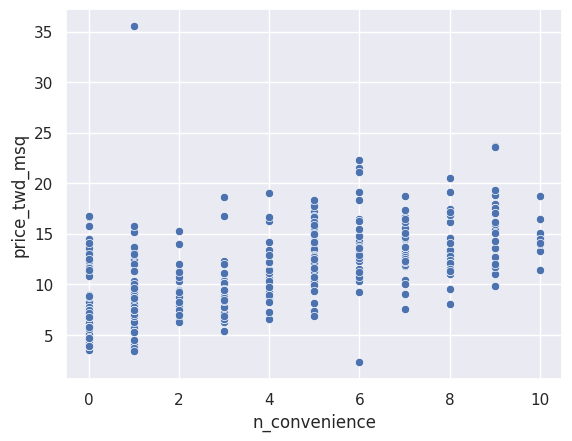

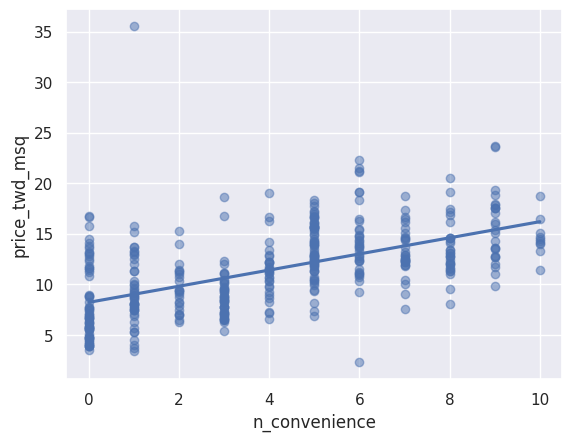

In [ ]:
taiwan_real_estate = pd.read_csv('taiwan_real_estate2.csv')
sns.scatterplot(x='n_convenience', y='price_twd_msq', data=taiwan_real_estate)
plt.show()

sns.regplot(x='n_convenience', y='price_twd_msq', data=taiwan_real_estate,
            ci=None, scatter_kws={'alpha': 0.5})
plt.show()

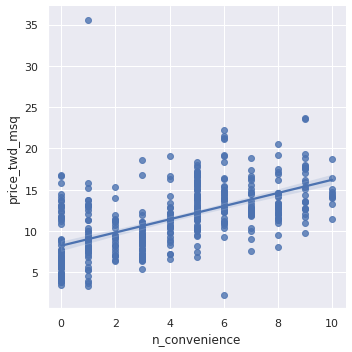

In [ ]:
sns.lmplot(x='n_convenience', y='price_twd_msq', data=taiwan_real_estate)
plt.show()

Scatter plots are the standard way to visualize the relationship between two numeric variables, and `seaborn` makes adding linear trend lines easy.

# **Fitting a simple linear regression**

In [ ]:
from statsmodels.formula.api import ols

model = ols('y ~ x', data=df)
model = model.fit()
print(model.params)

### **Linear regression with `ols()`**

While **`sns.regplot()`** can display a linear regression trend line, it doesn't give you access to the intercept and slope as variables, or allow you to work with the model results as variables. That means that sometimes you'll need to run a linear regression yourself.

Time to run your first model!

`taiwan_real_estate` is available. TWD is an abbreviation for Taiwan dollars.



* Run a linear regression with `price_twd_msq` as the response variable, `n_convenience` as the explanatory variable, and `taiwan_real_estate` as the dataset. Name it `mdl_price_vs_conv`.

* Fit the model.

* Print the parameters of the fitted model.

In [ ]:
taiwan_real_estate = pd.read_csv('taiwan_real_estate2.csv')

# Import the ols function
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience', data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept       8.224
n_convenience   0.798
dtype: float64


The intercept is positive, so a house with no convenience stores nearby still has a positive price. The coefficient for convenience stores is also positive, so as the number of nearby convenience stores increases, so does the price of the house.

# **Categorical explanatory variables**

Species variable is categorical.


## **`sns.displot` to plot categorical variable**

,species,mass_g,length_cm
39,Roach,120.0,18.6
109,Perch,1000.0,40.2
74,Perch,130.0,20.5
40,Roach,0.0,19.0
116,Pike,345.0,36.0


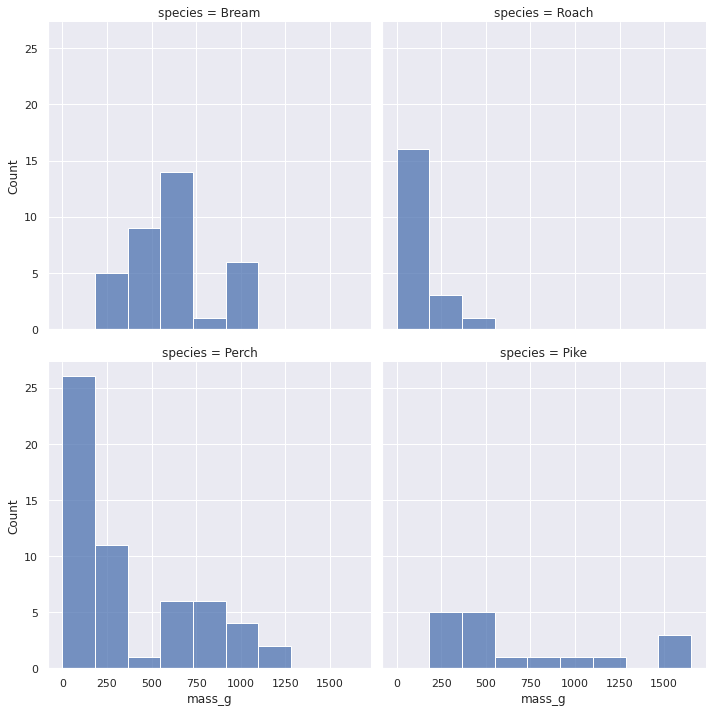

species
Bream    617.828571
Perch    382.239286
Pike     718.705882
Roach    152.050000
Name: mass_g, dtype: float64

In [ ]:
fish = pd.read_csv('fish.csv')
display(fish.sample(5))

sns.displot(data=fish, x="mass_g", col="species", col_wrap=2,bins=9)
plt.show()

summary_stats = fish.groupby("species")["mass_g"].mean()
display(summary_stats)

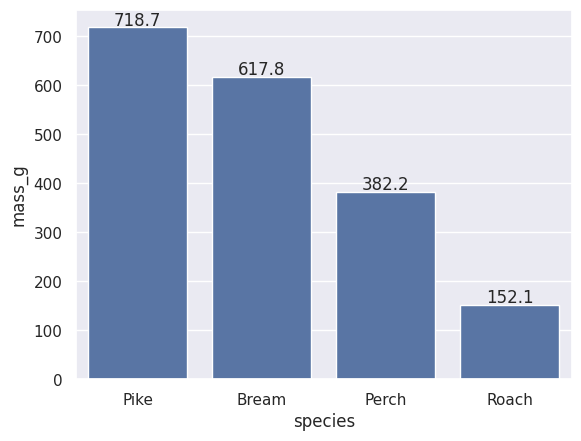

In [ ]:
s = sns.barplot(data=fish, x="species", y="mass_g", errorbar=None, order=['Pike', 'Bream', 'Perch', 'Roach'])
for p in s.patches:
    s.annotate(format(p.get_height(), '.1f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 5),
                      textcoords='offset points')
plt.show()

In [ ]:
mdl_mass_vs_species = ols("mass_g ~ species", data=fish).fit()

print(mdl_mass_vs_species.params)

Intercept           617.828571
species[T.Perch]   -235.589286
species[T.Pike]     100.877311
species[T.Roach]   -465.778571
dtype: float64


In [ ]:
print(f'{617.828571-235.589286}\n{617.828571+100.877311}\n{617.828571-465.778571}')

382.239285
718.705882
152.05


# **Without intercept for dummies**

In [ ]:
mdl_mass_vs_species = ols("mass_g ~ species + 0", data=fish).fit()

print(mdl_mass_vs_species.params)

species[Bream]    617.828571
species[Perch]    382.239286
species[Pike]     718.705882
species[Roach]    152.050000
dtype: float64


### **Visualizing numeric vs. categorical**

If the explanatory variable is categorical, the scatter plot that you used before to visualize the data doesn't make sense. Instead, a good option is to **draw a histogram for each category**.

The Taiwan real estate dataset has a categorical variable in the form of the age of each house. The ages have been split into 3 groups: 0 to 15 years, 15 to 30 years, and 30 to 45 years.


* Using `taiwan_real_estate`, plot a histogram of `price_twd_msq` with `10` bins. Split the plot by `house_age_years` to give `3` panels.

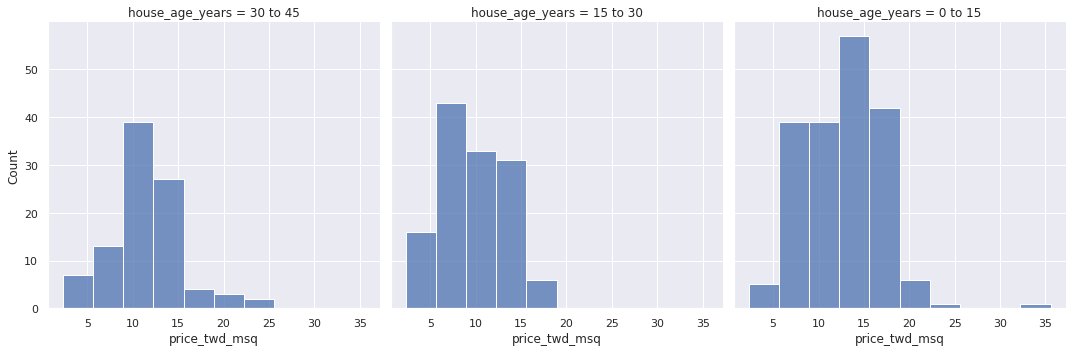

In [ ]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan_real_estate, x='price_twd_msq', col='house_age_years',
            bins=10)

# Show the plot
plt.show()

It appears that new houses are the most expensive on average, and the medium aged ones (15 to 30 years) are the cheapest.

### **Calculating means by category**

A good way to explore categorical variables further is to calculate summary statistics for each category. For example, you can calculate the mean and median of your response variable, ***grouped by a categorical variable***. As such, you can compare each category in more detail.

Here, you'll look at grouped means for the house prices in the Taiwan real estate dataset. This will help you understand the output of a linear regression with a categorical variable.

* Group `taiwan_real_estate` by `house_age_years` and calculate the mean price (`price_twd_msq`) for each age group. Assign the result to `mean_price_by_age`.
* Print the result and inspect the output.

In [ ]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby('house_age_years')['price_twd_msq'].mean()

# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


### **Linear regression with a categorical explanatory variable**

Great job calculating those grouped means! As mentioned in the last video, the means of each category will also be the coefficients of a linear regression model with one categorical variable. You'll prove that in this exercise.

To run a linear regression model with categorical explanatory variables, you can use the same code as with numeric explanatory variables. The coefficients returned by the model are different, however. Here you'll run a linear regression on the Taiwan real estate dataset.

* Run and fit a linear regression with `price_twd_msq` as the response variable, `house_age_years` as the explanatory variable, and `taiwan_real_estate` as the dataset. Assign to `mdl_price_vs_age`.
* Print its parameters.

* Update the model formula so that no intercept is included in the model. Assign to `mdl_price_vs_age0`.

* Print its parameters.

In [ ]:
# Create the model, fit it
mdl_price_vs_age = ols('price_twd_msq ~ house_age_years', data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

# Create the model, fit it
mdl_price_vs_age0 = ols('price_twd_msq ~ house_age_years + 0', data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64
house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


# **Making Predictions**


In [ ]:
fish = pd.read_csv('fish.csv')
bream = fish[fish["species"] == "Bream"]
bream.head()

,species,mass_g,length_cm
0,Bream,242.000,23.200
1,Bream,290.000,24.000
2,Bream,340.000,23.900
3,Bream,363.000,26.300
4,Bream,430.000,26.500


# **Plotting mass vs. length**

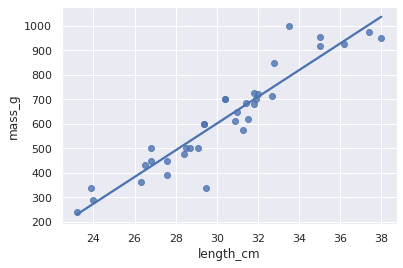

In [ ]:
sns.regplot(x="length_cm", y="mass_g", data=bream, ci=None)
plt.show()

In [ ]:
mdl_mass_vs_length = ols("mass_g ~ length_cm", data=bream).fit()
print(mdl_mass_vs_length.params)

Intercept   -1,035.348
length_cm       54.550
dtype: float64


# **Predict**

If I set explanatory variables to these values (Usually in the form of `np.linspace` or `np.arange`), what value would the dependent variables be?

Usually set

```
explanatory_data = pd.DataFrame('x', np.arange(a, b))
```
where $a$ is a lower bound and $b$ is an upper bound.

In [ ]:
# ต้องใช้ DataFrame เป็นตัวแปร
mdl_mass_vs_length.predict(pd.DataFrame({"length_cm": np.arange(20, 41)}))

,0
0,55.652
1,110.202
2,164.752
3,219.302
4,273.852
5,328.402
6,382.952
7,437.502
8,492.052
9,546.602


# **ใช้ assign จัดให้ดูดีขึ้น**

เป็นการจัดเรียงค่าที่ประมาณ ไว้ในตารางเดียวกันกับค่าตัวแปรต้น

In [ ]:
explanatory_data = pd.DataFrame({"length_cm": np.arange(20, 41)})
prediction_data = explanatory_data.assign(mass_g=mdl_mass_vs_length.predict(explanatory_data))

prediction_data

,length_cm,mass_g
0,20,55.652
1,21,110.202
2,22,164.752
3,23,219.302
4,24,273.852
5,25,328.402
6,26,382.952
7,27,437.502
8,28,492.052
9,29,546.602


# **Showing predictions**

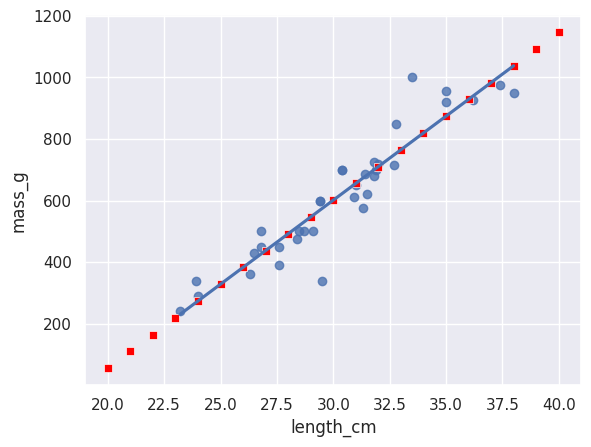

In [ ]:
fig = plt.figure()

sns.regplot(x="length_cm", y="mass_g", ci=None, data=bream)
sns.scatterplot(x="length_cm", y="mass_g", data=prediction_data, color="red", marker="s")

plt.show()

## **Extrapolation**

Suppose we want to know the predicted value at `length_cm = 10`.

In [ ]:
bream_10 = pd.DataFrame({'length_cm': [10]})
extrapolate = bream_10.assign(mass_g=mdl_mass_vs_length.predict(bream_10))
extrapolate

,length_cm,mass_g
0,10,-489.848


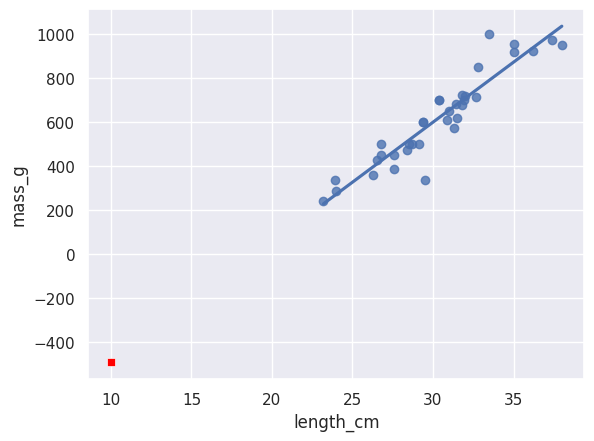

In [ ]:
fig = plt.figure()

sns.regplot(x="length_cm", y="mass_g", ci=None, data=bream)
sns.scatterplot(x="length_cm", y="mass_g", data=extrapolate, color="red", marker="s")
plt.show()

Extrapolation sometimes is misleading.

### **Predicting house prices**

Perhaps the most useful feature of statistical models like linear regression is that you can make predictions. That is, you specify values for each of the explanatory variables, feed them to the model, and get a prediction for the corresponding response variable. The code flow is as follows.

```
explanatory_data = pd.DataFrame({"explanatory_var": list_of_values})
predictions = model.predict(explanatory_data)
prediction_data = explanatory_data.assign(response_var=predictions)
```

Here, you'll make predictions for the house prices in the Taiwan real estate dataset.

* Create a DataFrame of explanatory data, where the number of convenience stores, `n_convenience`, takes the integer values from zero to ten.

* Use the model `mdl_price_vs_conv` to make predictions from `explanatory_data` and store it as `price_twd_msq`.

* Create a DataFrame of predictions named `prediction_data`. Start with `explanatory_data`, then add an extra column, `price_twd_msq`, containing the predictions you created in the previous step.


In [ ]:
# Import numpy with alias np
import numpy as np

# Create explanatory_data
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})

# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# Create prediction_data
prediction_data = explanatory_data.assign(price_twd_msq=price_twd_msq)

# Print the result
print(prediction_data)

    n_convenience  price_twd_msq
0               0          8.224
1               1          9.022
2               2          9.820
3               3         10.618
4               4         11.417
5               5         12.215
6               6         13.013
7               7         13.811
8               8         14.609
9               9         15.407
10             10         16.205


Having the predictions in a DataFrame will make it easier to visualize them.

### **Visualizing predictions**

The prediction DataFrame you created contains a column of explanatory variable values and a column of response variable values. That means you can plot it on the same scatter plot of response versus explanatory data values.



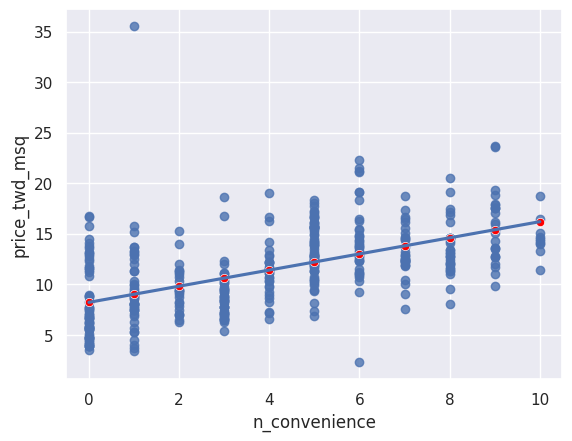

In [ ]:
# Create a new figure, fig
fig = plt.figure()

sns.regplot(x="n_convenience", y="price_twd_msq", data=taiwan_real_estate, ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x="n_convenience", y="price_twd_msq", data=prediction_data, color='red')
plt.show()

 The predicted points lie on the trend line.

 ### **The limits of prediction**

In the last exercise, you made predictions on some sensible, could-happen-in-real-life, situations. That is, the cases when the number of nearby convenience stores were between zero and ten. To test the limits of the model's ability to predict, try some impossible situations.

Use the console to try predicting house prices from `mdl_price_vs_conv` when there are `-1` convenience stores. Do the same for `2.5` convenience stores. What happens in each case?


* Define a DataFrame `impossible` with one column, `n_convenience`, set to -1 in the first row, and 2.5 in the second row.

In [ ]:
# Define a DataFrame impossible
impossible = pd.DataFrame({'n_convenience':[-1, 2.5]})
impossible.assign(price_twd_msq=mdl_price_vs_conv.predict(impossible))

,n_convenience,price_twd_msq
0,-1.0,7.426158
1,2.5,10.219437


The model successfully gives a prediction about cases that are impossible in real life.  Linear models don't know what is possible or not in real life. That means that they can give you predictions that don't make any sense when applied to your data. You need to understand what your data means in order to determine whether a prediction is nonsense or not.

# **`.params` attribute**

In [2]:
from statsmodels.formula.api import ols

fish = pd.read_csv('fish.csv')
bream = fish[fish["species"] == "Bream"]
mdl_mass_vs_length = ols("mass_g ~ length_cm", data=bream).fit()

mdl_mass_vs_length.params

,0
Intercept,"-1,035.348"
length_cm,54.550


# **`.fittedvalues` attribute**

In [3]:
print(mdl_mass_vs_length.fittedvalues.equals(mdl_mass_vs_length.predict(bream["length_cm"])))
mdl_mass_vs_length.fittedvalues


True


,0
0,230.212
1,273.852
2,268.397
3,399.317
4,410.227
5,426.592
6,426.592
7,470.232
8,470.232
9,519.327


# **`.resid` attribute**

actual response values minus
predicted response values

In [ ]:
print(mdl_mass_vs_length.resid.equals(bream["mass_g"] - mdl_mass_vs_length.fittedvalues))
mdl_mass_vs_length.resid

True


,0
0,11.788
1,16.148
2,71.603
3,-36.317
4,19.773
5,23.408
6,73.408
7,-80.232
8,-20.232
9,-19.327


## **Residual plot**

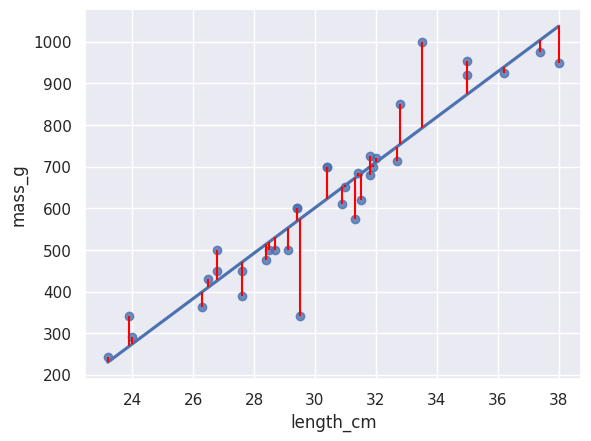

In [4]:
sns.regplot(data=bream, x="length_cm", y="mass_g", ci=None)
plt.vlines(bream['length_cm'], bream['mass_g'], mdl_mass_vs_length.fittedvalues, color='red')
plt.show()

# **`.summary()` method**

In [ ]:
print(mdl_mass_vs_length.summary())

                            OLS Regression Results                            
Dep. Variable:                 mass_g   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     237.6
Date:                Sun, 19 Jun 2022   Prob (F-statistic):           1.22e-16
Time:                        19:22:50   Log-Likelihood:                -199.35
No. Observations:                  35   AIC:                             402.7
Df Residuals:                      33   BIC:                             405.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1035.3476    107.973     -9.589      0.0

### ***Extracting model elements***

The model object created by **`ols()`** contains many elements. In order to perform further analysis on the model results, you need to extract its useful bits. The model coefficients, the fitted values, and the residuals are perhaps the most important pieces of the linear model object.


* Print the parameters of `mdl_price_vs_conv`.
* Print the fitted values of `mdl_price_vs_conv`.
* Print the residuals of `mdl_price_vs_conv`.
* Print a summary of `mdl_price_vs_conv`.

In [ ]:
# Print the model parameters of mdl_price_vs_conv
print(mdl_price_vs_conv.params)

# Print the fitted values of mdl_price_vs_conv
print(mdl_price_vs_conv.fittedvalues)

# Print the residuals of mdl_price_vs_conv
print(mdl_price_vs_conv.resid)

# Print a summary of mdl_price_vs_conv
print(mdl_price_vs_conv.summary())



Intercept        8.224237
n_convenience    0.798080
dtype: float64
0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64
0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64
                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Sun, 19 Jun 2022   Prob (F-statistic):           3.41e-37
Time:                        19:33:09   Log-Likelihood:                -1091.1
No. Observations:                 414   

### ***Manually predicting house prices***

You can manually calculate the predictions from the model coefficients. When making predictions in real life, it is better to use **`.predict()`**, but doing this manually is helpful to reassure yourself that predictions aren't magic - they are simply arithmetic.

In fact, for a simple linear regression, the predicted value is just the intercept plus the slope times the explanatory variable.

* Get the coefficients/parameters of `mdl_price_vs_conv`, assigning to `coeffs`.
* Get the intercept, which is the first element of `coeffs`, assigning to `intercept`.
* Get the slope, which is the second element of coeffs, assigning to `slope`.
* Manually predict `price_twd_msq` using the formula, specifying the `intercept`, `slope`, and `explanatory_data`.
* Run the code to compare your manually calculated predictions to the results from **`.predict()`**.

In [ ]:
explanatory_data = pd.DataFrame({"n_convenience": np.arange(0, 10)})

# Get the coefficients of mdl_price_vs_conv
coeffs = mdl_price_vs_conv.params

# Get the intercept
intercept = coeffs[0]

# Get the slope
slope = coeffs[1]

# Manually calculate the predictions
price_twd_msq = intercept + slope * explanatory_data
print(price_twd_msq)

# Compare to the results from .predict(
print(price_twd_msq.assign(predictions_auto=mdl_price_vs_conv.predict(explanatory_data)))

   n_convenience
0       8.224237
1       9.022317
2       9.820397
3      10.618477
4      11.416556
5      12.214636
6      13.012716
7      13.810795
8      14.608875
9      15.406955
   n_convenience  predictions_auto
0       8.224237          8.224237
1       9.022317          9.022317
2       9.820397          9.820397
3      10.618477         10.618477
4      11.416556         11.416556
5      12.214636         12.214636
6      13.012716         13.012716
7      13.810795         13.810795
8      14.608875         14.608875
9      15.406955         15.406955


# **Regression to the mean**

- Actual value = fitted value + residual
- *Regression to the mean* = extreme cases do not persist over time.

In [ ]:
fig = plt.figure()

sns.scatterplot(x='father_height_cm', y='son_height_cm', data=father_son)
plt.axline(xy1=(150, 150) # (x1, y1) is the coordinate of the intercept
           slope=1
           linewidth=2,
           color='green')
plt.axis('equal') # make x and y axis' scale equal
plt.show()

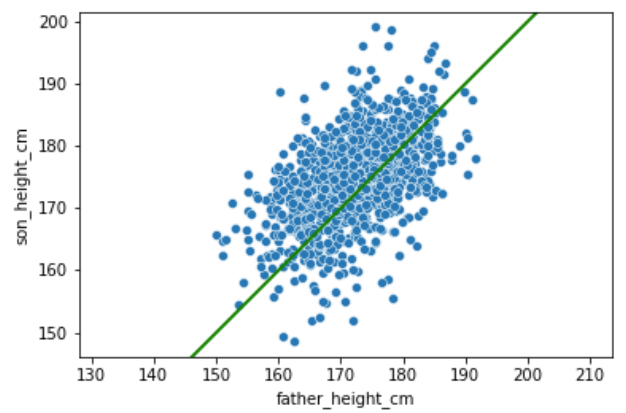

## **Adding a regression line**

In [ ]:
fig = plt.figure()

sns.regplot(x='father_height_cm', y='son_height_cm', data=father_son, ci=None, line_kws={'color': 'black'})

plt.axline(xy1=(150, 150) # (x1, y1) is the coordinate of the intercept
           slope=1
           linewidth=2,
           color='green')
plt.axis('equal') # make x and y axis' scale equal

plt.show()

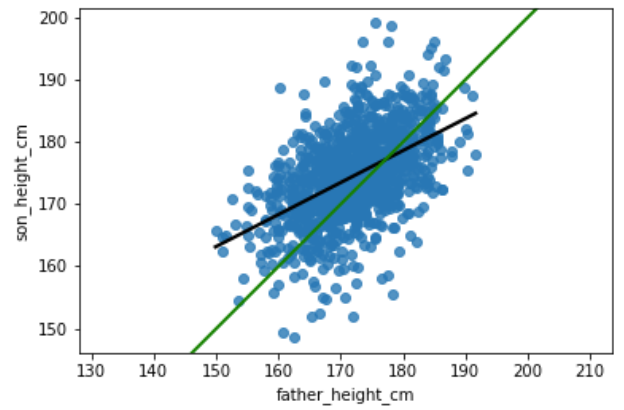

For short father (black line above green line), their sons are taller on average.

For tall father (black line below green line), their sons are shorter on average.

### **Home run!**

Regression to the mean is an important concept in many areas, including sports.

Here you can see a dataset of baseball batting data in 2017 and 2018. Each point represents a player, and more home runs are better. A naive prediction might be that the performance in 2018 is the same as the performance in 2017. That is, a linear regression would lie on the "y equals x" line.

Explore the plot and make predictions. What does regression to the mean say about the number of home runs in 2018 for a player who was very successful in 2017?

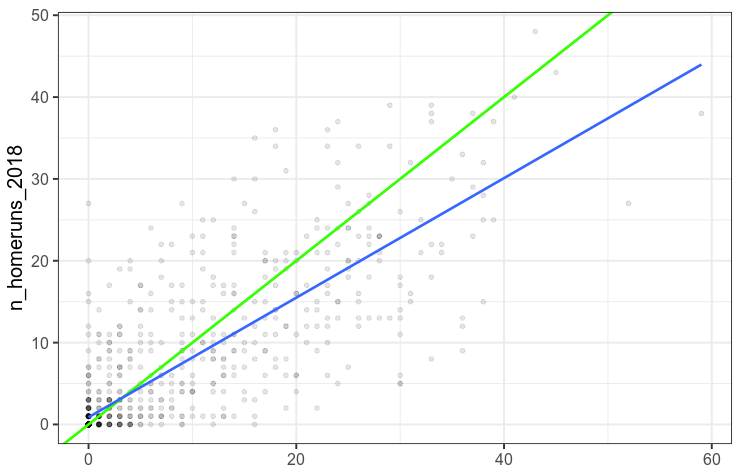

Someone who hit 40 home runs in 2017 is predicted to hit 10 fewer home runs the next year because regression to the mean states that, on average, extremely high values are not sustained.  It's common that one player or team that does really well one year, doesn't do as well the next. Likewise players or teams that perform very badly one year do better the next year.

### ***Regression to the Mean***: Plotting consecutive portfolio returns

* ค่าตัวแปรต้นที่มาก ในช่วงเวลาถัดมา มักพยากรณ์ได้ว่าจะน้อยลง ส่วนค่าตัวแปรต้นที่น้อย ในช่วงเวลาถัดมา มักพยากรณ์ได้ว่าจะมากขึ้น

Regression to the mean is also an important concept in investing. Here you'll look at the annual returns from investing in companies in the Standard and Poor 500 index (S&P 500), in 2018 and 2019.

The `sp500_yearly_returns` dataset contains three columns:

**variable	meaning**

* `symbol`:	Stock ticker symbol uniquely identifying the company.
* `return_2018`	A measure of investment performance in 2018.
* `return_2019`	A measure of investment performance in 2019.

A positive number for the return means the investment increased in value; negative means it lost value.

Just as with baseball home runs, a naive prediction might be that the investment performance stays the same from year to year, lying on the y equals x line.


* Create a new figure, `fig`, to enable plot layering.
* Generate a line at y equals x.
* Using `sp500_yearly_returns`, draw a scatter plot of `return_2019` vs. `return_2018` with a linear regression trend line, without a standard error ribbon.
* Set the axes so that the distances along the x and y axes look the same.

,symbol,return_2018,return_2019
0,AAPL,-0.053902,0.889578
1,MSFT,0.207953,0.575581
2,AMZN,0.284317,0.230278
3,FB,-0.257112,0.565718
4,GOOGL,-0.008012,0.281762


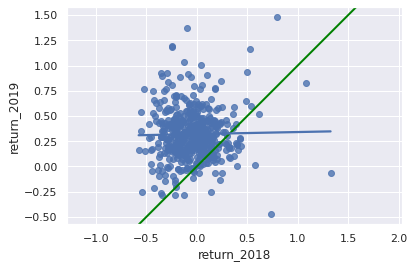

In [ ]:
sp500_yearly_returns = pd.read_csv('sp500_yearly_returns.csv')
display(sp500_yearly_returns.head())

# Create a new figure, fig
fig = plt.figure()

# Plot the first layer: y = x
plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

# Add scatter plot with linear regression trend line
sns.regplot(x='return_2018', y='return_2019', data=sp500_yearly_returns, ci=None)

# Set the axes so that the distances along the x and y axes look the same
plt.axis('equal')

# Show the plot
plt.show()

The regression trend line looks very different to the y equals x line. As the financial advisors say, **"Past performance is no guarantee of future results."**

### ***Modeling consecutive returns***

Let's quantify the relationship between returns in 2019 and 2018 by running a linear regression and making predictions. By looking at companies with extremely high or extremely low returns in 2018, we can see if their performance was similar in 2019.

* Run a linear regression on `return_2019` versus `return_2018` using `sp500_yearly_returns` and fit the model. Assign to `mdl_returns`.

* Create a DataFrame named `explanatory_data`. Give it one column (`return_2018`) with 2018 returns set to a list containing `-1`, `0`, and `1`.

* Use `mdl_returns` to predict with `explanatory_data`.

In [ ]:
mdl_returns = ols("return_2019 ~ return_2018", data=sp500_yearly_returns).fit()

# Create a DataFrame with return_2018 at -1, 0, and 1
explanatory_data = pd.DataFrame({'return_2018':[-1, 0, 1]})

# Use mdl_returns to predict with explanatory_data
print(round(mdl_returns.predict(explanatory_data), 3))

0    0.301
1    0.321
2    0.341
dtype: float64


Investments that gained a lot in value in 2018 on average gained only a small amount in 2019. Similarly, investments that lost a lot of value in 2018 on average also gained a small amount in 2019.

# **Nonlinear relationship**

,species,mass_g,length_cm
55,Perch,5.900,7.500
56,Perch,32.000,12.500
57,Perch,40.000,13.800
58,Perch,51.500,15.000
59,Perch,70.000,15.700


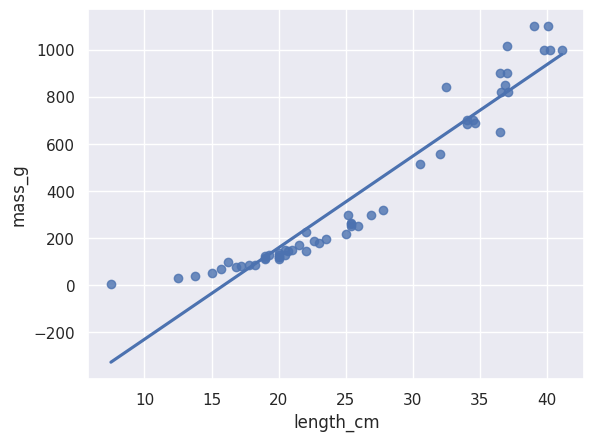

In [ ]:
fish = pd.read_csv('fish.csv')
perch = fish[fish["species"] == "Perch"]
display(perch.head())

sns.regplot(x="length_cm", y="mass_g", data=perch, ci=None)
plt.show()

## **Transform independent variable**



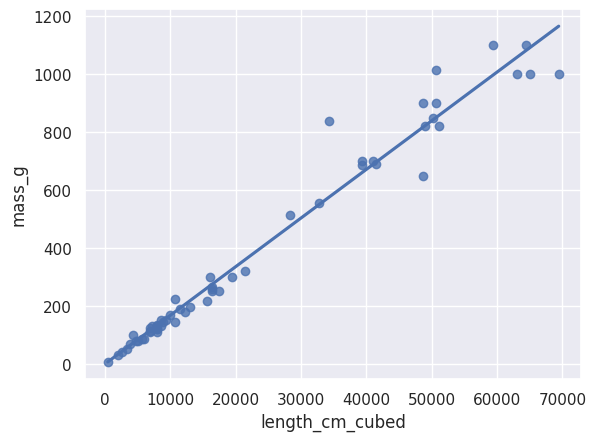

In [ ]:
perch["length_cm_cubed"] = perch["length_cm"] ** 3

sns.regplot(x="length_cm_cubed", y="mass_g", data=perch, ci=None)
plt.show()

In [ ]:
mdl_perch = ols("mass_g ~ length_cm_cubed", data=perch).fit()
mdl_perch.params

,0
Intercept,-0.117
length_cm_cubed,0.017


# **Predicting mass vs. length cubed**



In [ ]:
explanatory_data = pd.DataFrame({"length_cm_cubed": np.arange(10, 41, 5) ** 3,
                                 "length_cm": np.arange(10, 41, 5)}) # for reference

prediction_data = explanatory_data.assign(mass_g=mdl_perch.predict(explanatory_data))
prediction_data

,length_cm_cubed,length_cm,mass_g
0,1000,10,16.678
1,3375,15,56.568
2,8000,20,134.247
3,15625,25,262.314
4,27000,30,453.364
5,42875,35,719.994
6,64000,40,"1,074.802"


# **Plotting mass vs. length cubed**

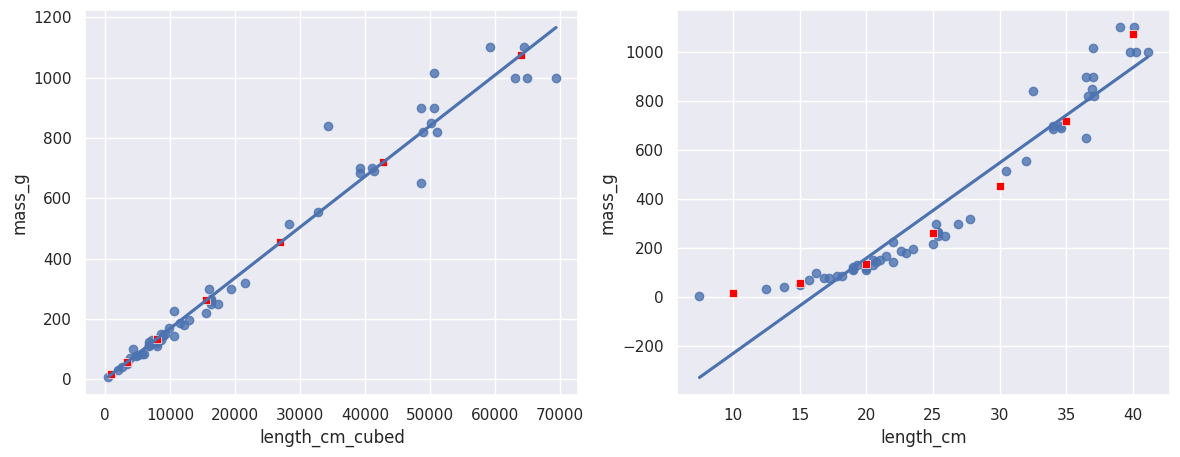

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.regplot(x="length_cm_cubed", y="mass_g", data=perch, ci=None, ax=ax[0])
sns.scatterplot(data=prediction_data, x="length_cm_cubed", y="mass_g",color="red", marker="s", ax=ax[0])

sns.regplot(x="length_cm", y="mass_g", data=perch, ci=None, ax=ax[1])
sns.scatterplot(data=prediction_data, x="length_cm", y="mass_g", color="red", marker="s", ax=ax[1])

plt.show()

# **Plot is cramped**

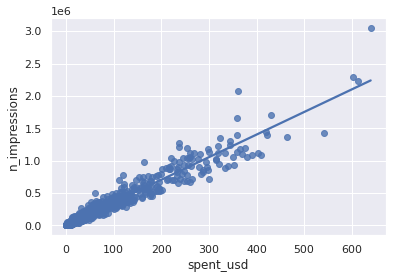

In [ ]:
ad_conversion = pd.read_csv('ad_conversion.csv')

sns.regplot(x="spent_usd", y="n_impressions", data=ad_conversion, ci=None)
plt.show()

# **Square root vs square root**

Plot is a little bit more spread out

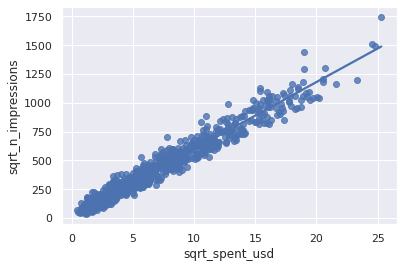

In [ ]:
ad_conversion["sqrt_spent_usd"] = np.sqrt(ad_conversion["spent_usd"])
ad_conversion["sqrt_n_impressions"] = np.sqrt(ad_conversion["n_impressions"])

sns.regplot(x="sqrt_spent_usd", y="sqrt_n_impressions", data=ad_conversion, ci=None)
plt.show()

# **Modeling and predicting**

In [ ]:
mdl_ad = ols("sqrt_n_impressions ~ sqrt_spent_usd", data=ad_conversion).fit()
explanatory_data = pd.DataFrame({"sqrt_spent_usd": np.sqrt(np.arange(0, 601, 100)),
                                 "spent_usd": np.arange(0, 601, 100)})

prediction_data = explanatory_data.assign(sqrt_n_impressions=mdl_ad.predict(explanatory_data),
n_impressions = mdl_ad.predict(explanatory_data) ** 2)

prediction_data

,sqrt_spent_usd,spent_usd,sqrt_n_impressions,n_impressions
0,0.00,0,15.32,234.69
1,10.00,100,597.74,"357,289.02"
2,14.14,200,838.98,"703,890.04"
3,17.32,300,"1,024.10","1,048,771.23"
4,20.00,400,"1,180.15","1,392,762.17"
5,22.36,500,"1,317.64","1,736,184.19"
6,24.49,600,"1,441.94","2,079,202.09"


### ***Transforming the explanatory variable***

If there is no straight-line relationship between the response variable and the explanatory variable, it is sometimes possible to create one by transforming one or both of the variables. Here, you'll look at transforming the explanatory variable.

You'll take another look at the Taiwan real estate dataset, this time using the distance to the nearest MRT (metro) station as the explanatory variable. You'll use code to make every commuter's dream come true: shortening the distance to the metro station by taking the square root. Take that, geography!


* Look at the plot.

* Add a new column to `taiwan_real_estate` called `sqrt_dist_to_mrt_m` that contains the square root of `dist_to_mrt_m`.

* Create the same scatter plot as the first one, but use the new transformed variable on the x-axis instead.

* Look at the new plot. Notice how the numbers on the x-axis have changed. This is a different line to what was shown before. Do the points track the line more closely?

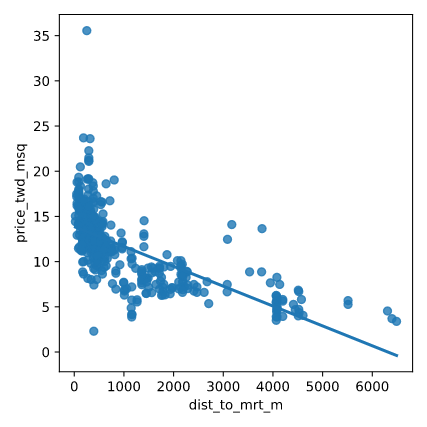

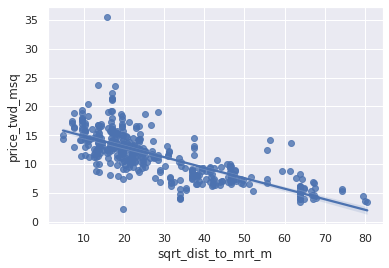

In [ ]:
taiwan_real_estate = pd.read_csv('taiwan_real_estate2.csv')

# Create sqrt_dist_to_mrt_m
taiwan_real_estate['sqrt_dist_to_mrt_m'] = np.sqrt(taiwan_real_estate['dist_to_mrt_m'])

plt.figure()

# Plot using the transformed variable
sns.regplot(x='sqrt_dist_to_mrt_m', y='price_twd_msq', data=taiwan_real_estate)
plt.show()

* Run a linear regression of `price_twd_msq` versus the square root of `dist_to_mrt_m` using `taiwan_real_estate`.


In [ ]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols('price_twd_msq ~ sqrt_dist_to_mrt_m', data=taiwan_real_estate).fit()

# Print the parameters
mdl_price_vs_dist.params

Intercept            16.71
sqrt_dist_to_mrt_m   -0.18
dtype: float64

* Create a DataFrame of predictions named `prediction_data` by adding a column of predictions called `price_twd_msq` to `explanatory_data`. Predict using `mdl_price_vs_dist` and `explanatory_data`.


In [ ]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. sqrt_dist_to_mrt_m
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Create prediction_data by adding a column of predictions to explantory_data
prediction_data = explanatory_data.assign(price_twd_msq = mdl_price_vs_dist.predict(explanatory_data))

# Print the result
prediction_data

,sqrt_dist_to_mrt_m,dist_to_mrt_m,price_twd_msq
0,0.00,0,16.71
1,10.00,100,14.88
2,20.00,400,13.05
3,30.00,900,11.22
4,40.00,1600,9.40
5,50.00,2500,7.57
6,60.00,3600,5.74
7,70.00,4900,3.91
8,80.00,6400,2.08


* Add a layer to your plot containing points from `prediction_data`, colored `"red"`.

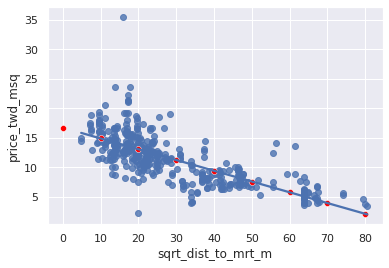

In [ ]:
fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x='sqrt_dist_to_mrt_m', y='price_twd_msq', data=prediction_data, color='red')
plt.show()

By transforming the explanatory variable, the relationship with the response variable became linear, and so a linear regression became an appropriate model.

### **Transforming the response variable too**

The response variable can be transformed too, but this means you need an extra step at the end to undo that transformation. That is, you "back transform" the predictions.

* Look at the plot.
* Create a `qdrt_n_impressions` column using `n_impressions` raised to the power of 0.25.
* Create a `qdrt_n_clicks` column using `n_clicks` raised to the power of 0.25.
* Create a regression plot using the transformed variables. Do the points track the line more closely?

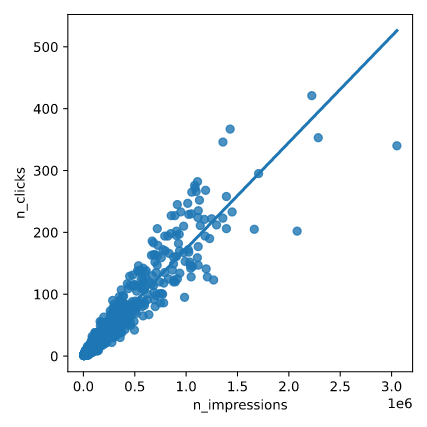

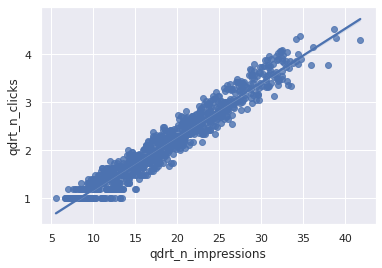

In [ ]:
ad_conversion = pd.read_csv('ad_conversion.csv')

# Create qdrt_n_impressions and qdrt_n_clicks
ad_conversion["qdrt_n_impressions"] = ad_conversion['n_impressions'] ** 0.25

ad_conversion["qdrt_n_clicks"] = ad_conversion['n_clicks'] ** 0.25

plt.figure()

# Plot using the transformed variables
sns.regplot(x='qdrt_n_impressions', y='qdrt_n_clicks', data=ad_conversion)
plt.show()

* Run a linear regression of `qdrt_n_clicks` versus `qdrt_n_impressions` using `ad_conversion` and assign it to mdl_click_vs_impression.
* create the prediction data.

In [ ]:
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25

mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion, ci=None).fit()

explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks=mdl_click_vs_impression.predict(explanatory_data))

# Print the result
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0                0.00           0.00           0.07
1               26.59     500,000.00           3.04
2               31.62   1,000,000.00           3.60
3               35.00   1,500,000.00           3.97
4               37.61   2,000,000.00           4.27
5               39.76   2,500,000.00           4.51
6               41.62   3,000,000.00           4.71


Since the response variable has been transformed, you'll now need to back-transform the predictions to correctly interpret your results.

### **Back transformation**

In the previous exercise, you transformed the response variable, ran a regression, and made predictions. But you're not done yet! In order to correctly interpret and visualize your predictions, you'll need to do a back-transformation.

* Back transform the response variable in `prediction_data` by raising `qdrt_n_clicks` to the power `4` to get n_clicks.

   qdrt_n_impressions  n_impressions  qdrt_n_clicks  n_clicks
0                0.00           0.00           0.07      0.00
1               26.59     500,000.00           3.04     85.14
2               31.62   1,000,000.00           3.60    167.73
3               35.00   1,500,000.00           3.97    249.66
4               37.61   2,000,000.00           4.27    331.21
5               39.76   2,500,000.00           4.51    412.51
6               41.62   3,000,000.00           4.71    493.61


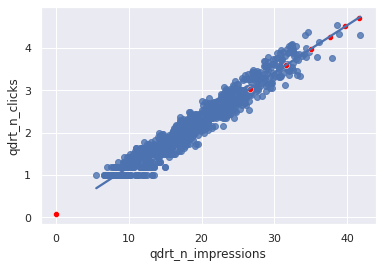

In [ ]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data['qdrt_n_clicks'] ** 4
print(prediction_data)

# Plot the transformed variables
fig = plt.figure()
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x='qdrt_n_impressions', y="qdrt_n_clicks", data=prediction_data, color='red')
plt.show()

Notice that your back-transformed predictions nicely follow the trend line and allow you to make more accurate predictions.

# **Assessing Model Fit $R^2$**


## **`.summary()`**

* Look at the value titled `"R-Squared"`

In [ ]:
fish = pd.read_csv('fish.csv')
bream = fish[fish["species"] == "Bream"]

mdl_bream = ols("mass_g ~ length_cm", data=bream).fit()
print(mdl_bream.summary())

                            OLS Regression Results                            
Dep. Variable:                 mass_g   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     237.6
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           1.22e-16
Time:                        14:50:13   Log-Likelihood:                -199.35
No. Observations:                  35   AIC:                             402.7
Df Residuals:                      33   BIC:                             405.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1035.3476    107.973     -9.589      0.0

# **`.rsquared` attribute**

In [ ]:
round(mdl_bream.rsquared, 2)

0.88

# **It's just correlation squared for regression of one variable.**

In [ ]:
round(bream["length_cm"].corr(bream["mass_g"]) ** 2, 2)

0.88

# **Residual Standard Error (RSE)**

Each residual is the difference between a predicted value and an actual value.

- Same units as the dependent variable

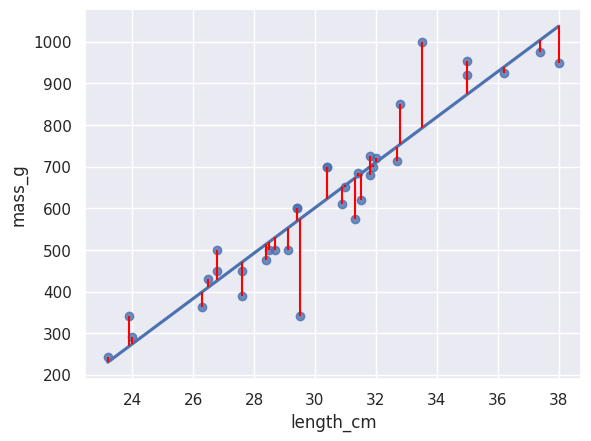

In [5]:
sns.regplot(data=bream, x="length_cm", y="mass_g", ci=None)
plt.vlines(bream['length_cm'], bream['mass_g'], mdl_mass_vs_length.fittedvalues, color='red')
plt.show()

In [ ]:
mse = mdl_bream.mse_resid
print('mse: ', mse)

rse = np.sqrt(mse)
print("rse: ", rse)

mse:  5498.55508497352
rse:  74.15224261594197


# **Calculating RSE: residuals squared**

In [ ]:
residuals_sq = mdl_bream.resid ** 2
SSR = sum(residuals_sq)
rse = np.sqrt(SSR/(len(bream) - 2))  # n-2 คือจำนวน degree of freedom
print(rse)

# ถ้าไม่จับกำลังสองก่อน มาบวกกันเลยจะได้ศูนย์
round(sum(mdl_bream.resid),2)

74.15224261594197


-0.0

# **Interpreting RSE**

The difference between predicted bream masses and observed bream masses is typically about 74g.

# **Root-mean-square error (RMSE)**

Similar to RSE but divided by n, not n-2.  
- Should use RSE instead.

  

In [ ]:
rmse = np.sqrt(SSR/(len(bream)))
print("rmse :", rmse)

rmse : 72.00244396727619


### ***Coefficient of determination***

The coefficient of determination is a measure of how well the linear regression line fits the observed values. For simple linear regression, it is equal to the square of the correlation between the explanatory and response variables.

Here, you'll take another look at the second stage of the advertising pipeline: modeling the click response to impressions. Two models are available: `mdl_click_vs_impression_orig` models `n_clicks` versus `n_impressions`. `mdl_click_vs_impression_trans` is the transformed model as previous. It models `n_clicks` to the power of 0.25 versus `n_impressions` to the power of 0.25.

* Print the summary of `mdl_click_vs_impression_orig`.
* Do the same for `mdl_click_vs_impression_trans`.

In [ ]:
ad_conversion = pd.read_csv('ad_conversion.csv')
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25
mdl_click_vs_impression_trans = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion, ci=None).fit()
mdl_click_vs_impression_orig  = ols("n_clicks ~ n_impressions", data=ad_conversion, ci=None).fit()

###############################################################################

# Print a summary of mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.summary())

# Print a summary of mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.summary())

                            OLS Regression Results                            
Dep. Variable:               n_clicks   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     7683.
Date:                Mon, 20 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:24:24   Log-Likelihood:                -4126.7
No. Observations:                 936   AIC:                             8257.
Df Residuals:                     934   BIC:                             8267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6829      0.789      2.133

* Print the coefficient of determination for `mdl_click_vs_impression_orig`.
* Do the same for `mdl_click_vs_impression_trans`.

In [ ]:
# Print the coeff of determination for mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.rsquared)

# Print the coeff of determination for mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.rsquared)

0.8916134973508041
0.9445272817143905


The transformed model has a higher coefficient of determination than the original model, suggesting that it gives a better fit to the data.

### ***Residual standard error***

Residual standard error (RSE) is a measure of the typical size of the residuals. Equivalently, it's a measure of how wrong you can expect predictions to be. Smaller numbers are better, with zero being a perfect fit to the data.

Again, you'll look at the models from the advertising pipeline, `mdl_click_vs_impression_orig` and `mdl_click_vs_impression_trans`.

* Calculate the MSE of `mdl_click_vs_impression_orig`, assigning to `mse_orig`.
* Using `mse_orig`, calculate and print the RSE of `mdl_click_vs_impression_orig`.
* Do the same for `mdl_click_vs_impression_trans`.

In [ ]:
# Calculate mse_orig for mdl_click_vs_impression_orig
mse_orig = mdl_click_vs_impression_orig.mse_resid

# Calculate rse_orig for mdl_click_vs_impression_orig and print it
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", round(rse_orig))

# Calculate mse_trans for mdl_click_vs_impression_trans
mse_trans = mdl_click_vs_impression_trans.mse_resid

# Calculate rse_trans for mdl_click_vs_impression_trans and print it
rse_trans = np.sqrt(mse_trans)
print("RSE of transformed model: ", round(rse_trans, 2))

RSE of original model:  20
RSE of transformed model:  0.2


* `mdl_click_vs_impression_orig` has an RSE of about 20.

  * The typical difference between observed number of clicks and predicted number of clicks is 20.

* Which model does the RSE suggest gives more accurate predictions?
  * The transformed model, `mdl_click_vs_impression_trans`.

RSE is a measure of accuracy for regression models. It even works on other statistical model types like regression trees, so you can compare accuracy across different classes of models.

# **Visualizing model fit**

## **Residual properties of a good fit**

- Residuals are normally distributed
- The mean of residuals is zero

## **`sns.residplot`**

* ถ้า residuals มีการกระจายแบบปกติมาตรฐานก็ควรมีการกระจายตัวอยู่รอบๆแกน x
* เส้นสีแดง เรียกว่า LOWESS Trend line


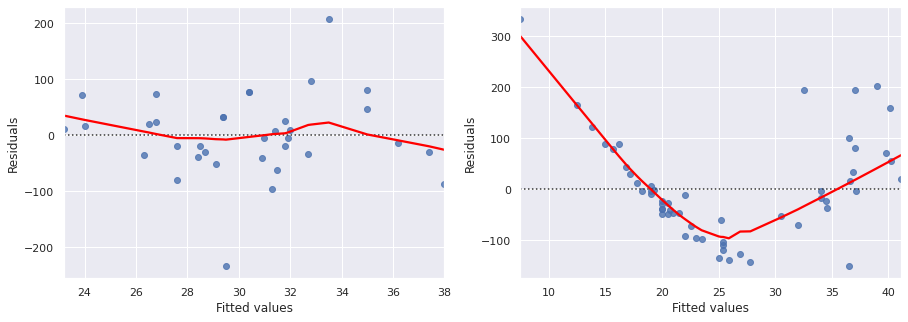

In [ ]:
fish = pd.read_csv('fish.csv')
bream = fish[fish["species"] == "Bream"]
perch = fish[fish["species"] == "Perch"]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.residplot(x="length_cm", y="mass_g", data=bream, lowess=True, ax=ax[0],
              line_kws={"color": "red"})
ax[0].set_xlabel("Fitted values")
ax[0].set_ylabel("Residuals")

sns.residplot(x="length_cm", y="mass_g", data=perch, lowess=True, ax=ax[1],
              line_kws={"color": "red"})
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

# **Q-Q Plot**

* เอามาพล็อตดูว่าค่า residuals ตกอยู่ตามควอนไทล์ต่างๆของการกระจายแบบปกติมาตรฐานหรือไม่
* ถ้าจุดต่างๆตกอยู่บนเส้น 45 องศา แปลว่ามีการกระจายแบบปกติ

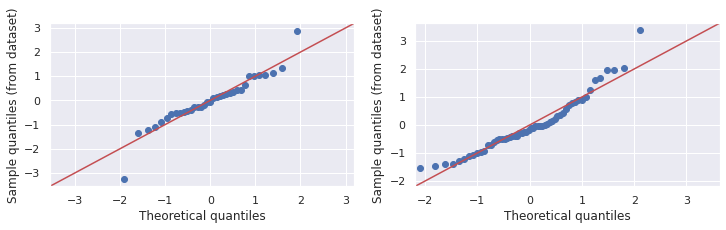

In [ ]:
from statsmodels.api import qqplot

mdl_bream = ols("mass_g ~ length_cm", data=bream).fit()
mdl_perch = ols("mass_g ~ length_cm", data=perch).fit()

fig, ax = plt.subplots(1, 2, figsize=(12, 3))

# line='45' มีไว้เพื่อลากเส้น 45 องศา
qqplot(data=mdl_bream.resid, fit=True, line="45", ax=ax[0])
ax[0].set_xlabel("Theoretical quantiles")
ax[0].set_ylabel("Sample quantiles (from dataset)")

qqplot(data=mdl_perch.resid, fit=True, line="45", ax=ax[1])
ax[1].set_xlabel("Theoretical quantiles")
ax[1].set_ylabel("Sample quantiles (from dataset)")
plt.show()

# **Scale-location plot**

* แสดงสแควร์รูทของ standardized residuals


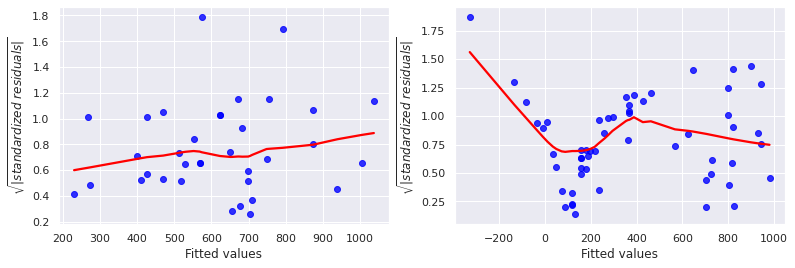

In [ ]:
model_norm_residuals_bream = mdl_bream.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt_bream = np.sqrt(np.abs(model_norm_residuals_bream))
model_norm_residuals_perch = mdl_perch.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt_perch = np.sqrt(np.abs(model_norm_residuals_perch))

fig, ax = plt.subplots(1, 2, figsize=(13, 4))
sns.regplot(x=mdl_bream.fittedvalues, y=model_norm_residuals_abs_sqrt_bream, ci=None, lowess=True, ax=ax[0],
            scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax[0].set_xlabel("Fitted values")
ax[0].set_ylabel(r"$\sqrt{|standardized \ residuals|}$")

sns.regplot(x=mdl_perch.fittedvalues, y=model_norm_residuals_abs_sqrt_perch, ci=None, lowess=True, ax=ax[1],
            scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax[1].set_xlabel("Fitted values")
ax[1].set_ylabel(r"$\sqrt{|standardized \ residuals|}$")
plt.show()

### ***Residuals vs. fitted values***

*Look at the numbers on the y-axis scales and how well the trend lines follow the $y=0$ line.*

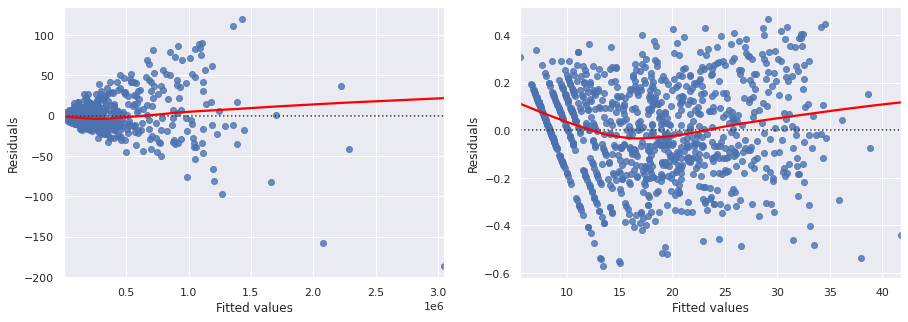

In [ ]:
ad_conversion = pd.read_csv('ad_conversion.csv')
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25
mdl_click_vs_impression_trans = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion, ci=None).fit()
mdl_click_vs_impression_orig  = ols("n_clicks ~ n_impressions", data=ad_conversion, ci=None).fit()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.residplot(x="n_impressions", y="n_clicks", data=ad_conversion, lowess=True, ax=ax[0],
              line_kws={"color": "red"})
ax[0].set_xlabel("Fitted values")
ax[0].set_ylabel("Residuals")

sns.residplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, lowess=True, ax=ax[1],
              line_kws={"color": "red"})
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

The residuals track the $y=0$ line more closely in the transformed model compared to the original model, indicating that the transformed model is a better fit for the data.  *In a good model, the residuals should have a trend line close to zero.*

### ***Q-Q plot of residuals***

* Look at how well the points track the "normality" line.

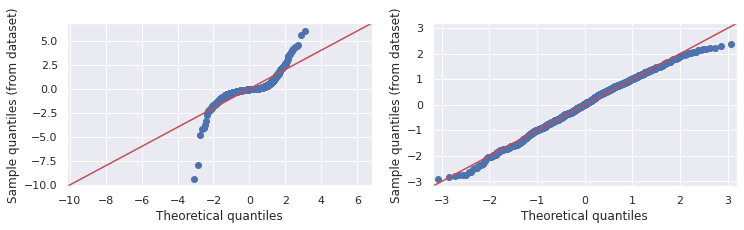

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3))

# line='45' มีไว้เพื่อลากเส้น 45 องศา
qqplot(data=mdl_click_vs_impression_orig.resid, fit=True, line="45", ax=ax[0])
ax[0].set_xlabel("Theoretical quantiles")
ax[0].set_ylabel("Sample quantiles (from dataset)")

qqplot(data=mdl_click_vs_impression_trans.resid, fit=True, line="45", ax=ax[1])
ax[1].set_xlabel("Theoretical quantiles")
ax[1].set_ylabel("Sample quantiles (from dataset)")
plt.show()

The residuals track the "normality" line more closely in the transformed model compared to the original model, indicating that the transformed model is a better fit for the data.

If the residuals from the model are normally distributed, then the points will track the line on the Q-Q plot. In this case, neither model is perfect, but the transformed model is closer.

### ***Scale-location***

* Look at the numbers on the y-axis and the slope of the trend line.

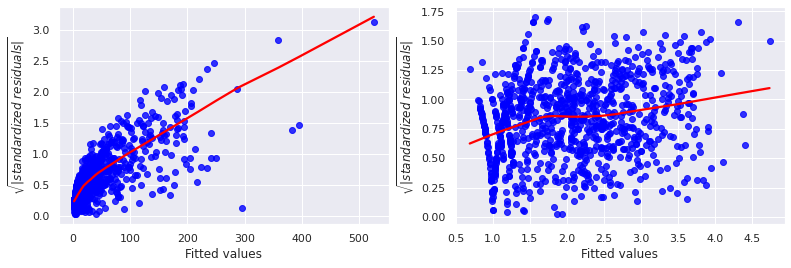

In [ ]:
orig = mdl_click_vs_impression_orig.get_influence().resid_studentized_internal
sqrt_orig = np.sqrt(np.abs(orig))
trans = mdl_click_vs_impression_trans.get_influence().resid_studentized_internal
sqrt_trans = np.sqrt(np.abs(trans))

fig, ax = plt.subplots(1, 2, figsize=(13, 4))
sns.regplot(x=mdl_click_vs_impression_orig.fittedvalues, y=sqrt_orig, ci=None, lowess=True, ax=ax[0],
            scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax[0].set_xlabel("Fitted values")
ax[0].set_ylabel(r"$\sqrt{|standardized \ residuals|}$")

sns.regplot(x=mdl_click_vs_impression_trans.fittedvalues, y=sqrt_trans, ci=None, lowess=True, ax=ax[1],
            scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax[1].set_xlabel("Fitted values")
ax[1].set_ylabel(r"$\sqrt{|standardized \ residuals|}$")
plt.show()

The size of the standardized residuals is more consistent in the transformed model compared to the original model, indicating that the transformed model is a better fit for the data. *In a good model, the size of the residuals shouldn't change much as the fitted values change.*

### ***Drawing diagnostic plots***

It's time for you to draw these diagnostic plots yourself using the Taiwan real estate dataset and the model of house prices versus number of convenience stores.

* Create the residuals versus fitted values plot. Add a lowess argument to visualize the trend of the residuals.

* Import **`qqplot()`** from **`statsmodels.api`**.
* Create the Q-Q plot of the residuals.

* Create the scale-location plot.


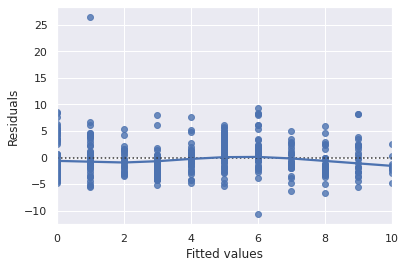

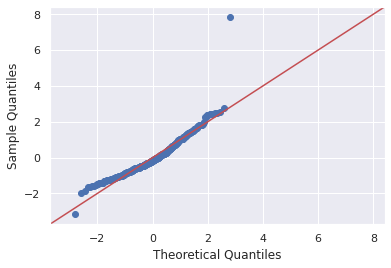

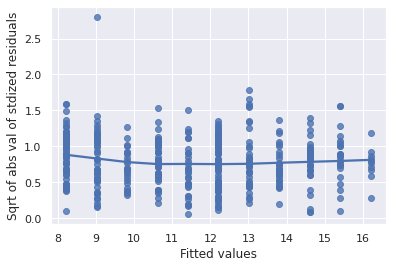

In [ ]:
taiwan_real_estate = pd.read_csv('taiwan_real_estate2.csv')
mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience', data=taiwan_real_estate).fit()

# Plot the residuals vs. fitted values
sns.residplot(x='n_convenience', y='price_twd_msq', data=taiwan_real_estate, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()

# Import qqplot
from statsmodels.api import qqplot

# Create the Q-Q plot of the residuals
qqplot(data=mdl_price_vs_conv.resid, fit=True, line="45")

# Show the plot
plt.show()

# Preprocessing steps
model_norm_residuals = mdl_price_vs_conv.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
sns.regplot(x=mdl_price_vs_conv.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

# Show the plot
plt.show()

These three diagnostic plots are excellent for sanity-checking the quality of your models.

# **Outliers**

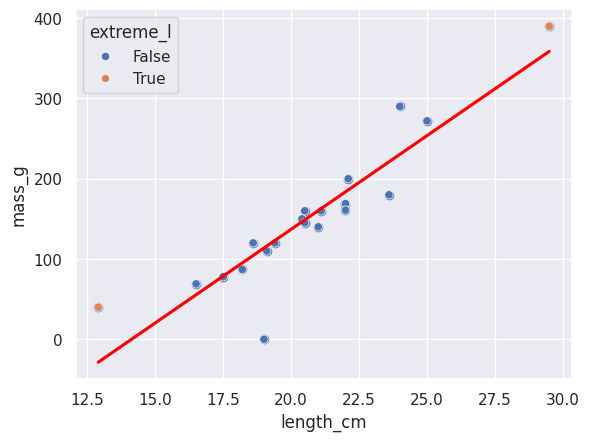

In [8]:
roach = fish[fish['species'] == "Roach"]
roach["extreme_l"] = ((roach["length_cm"] < 15) | (roach["length_cm"] > 26))

sns.regplot(x="length_cm", y="mass_g", data=roach, ci=None, line_kws={'color':'red'})
sns.scatterplot(x="length_cm", y="mass_g", hue="extreme_l", data=roach)

plt.show()

# **Response values away from the regression line**

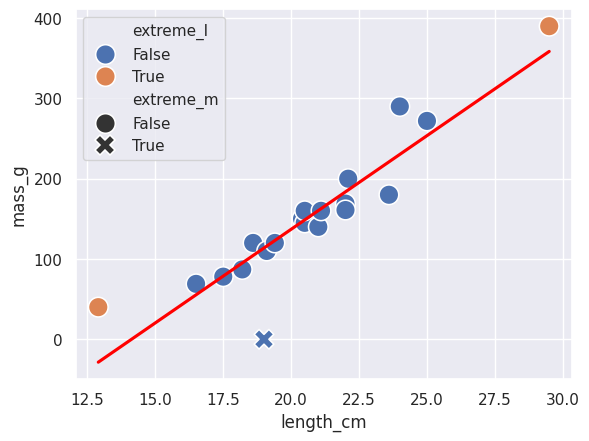

In [16]:
roach["extreme_m"] = roach["mass_g"] < 1

fig = plt.figure()
sns.regplot(x="length_cm", y="mass_g", data=roach, ci=None, line_kws={'color':'red'})
sns.scatterplot(x="length_cm", y="mass_g", hue="extreme_l", style="extreme_m", data=roach, s=200)

plt.show()

# **Leverage and influence**

- *Leverage* measures how extreme the explanatory variables are.
- *Influence* measures how much the model changes if you leave the observation out (robustness)

## **`.get_influence()` and `.summary_frame()`**

 * leverage ใช้ดูว่ามีตัวแปรต้น ที่เป็น outliers มากไหม

In [ ]:
mdl_roach = ols("mass_g ~ length_cm", data=roach).fit()
summary_roach = mdl_roach.get_influence().summary_frame()
roach["leverage"] = summary_roach["hat_diag"]
roach.head()

,species,mass_g,length_cm,extreme_l,extreme_m,leverage,cooks_dist
35,Roach,40.00,12.90,True,False,0.31,1.07
36,Roach,69.00,16.50,False,False,0.13,0.01
37,Roach,78.00,17.50,False,False,0.09,0.00
38,Roach,87.00,18.20,False,False,0.08,0.00
39,Roach,120.00,18.60,False,False,0.07,0.01


# **Cook's distance**

Cook's distance is the most common measure of **influence**.

* **Influence** ดูว่าพวก outliers มีผลกับแบบจำลองมากไหม ถ้าโดนเอาออกไป

In [ ]:
roach["cooks_dist"] = summary_roach["cooks_d"]
roach.sort_values("cooks_dist", ascending = False).head()

,species,mass_g,length_cm,extreme_l,extreme_m,leverage,cooks_dist
35,Roach,40.00,12.90,True,False,0.31,1.07
54,Roach,390.00,29.50,True,False,0.39,0.37
40,Roach,0.00,19.00,False,True,0.06,0.31
52,Roach,290.00,24.00,False,False,0.10,0.15
51,Roach,180.00,23.60,False,False,0.09,0.06


```
      species	mass_g	length_cm	extreme_l	extreme_m	leverage	cooks_dist
35	Roach	 40.00	12.90	True	False	0.31	1.07 <== very short Roach
54	Roach	390.00	29.50	True	False	0.39	0.37 <== very long Roach
```


# **Removing the most influential roach**

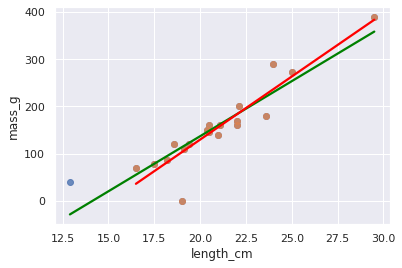

In [ ]:
roach_not_short = roach[roach["length_cm"] > 12.9]

sns.regplot(x="length_cm", y="mass_g", data=roach, ci=None, line_kws={"color": "green"})
sns.regplot(x="length_cm", y="mass_g", data=roach_not_short, ci=None, line_kws={"color": "red"})
plt.show()

The slope of the regression line changes just by removing only one data point.

### ***Leverage***

Leverage measures how unusual or extreme the explanatory variables are for each observation. Very roughly, high leverage means that the explanatory variable has values that are different from other points in the dataset. In the case of simple linear regression, where there is only one explanatory value, this typically means values with a very high or very low explanatory value.

Here, you'll look at highly leveraged values in the model of house price versus the square root of distance from the nearest MRT station in the Taiwan real estate dataset.

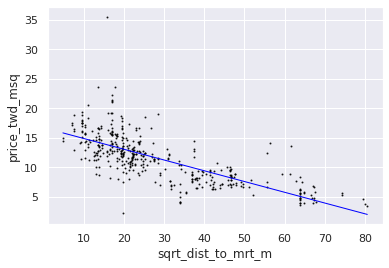

In [ ]:
taiwan_real_estate = pd.read_csv('taiwan_real_estate2.csv')
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])
mdl_price_vs_dist = ols('price_twd_msq ~ sqrt_dist_to_mrt_m', data=taiwan_real_estate).fit()
taiwan_real_estate['sqrt_dist_to_mrt_m'] = np.sqrt(taiwan_real_estate['dist_to_mrt_m'])
sns.regplot(x='sqrt_dist_to_mrt_m', y='price_twd_msq', data=taiwan_real_estate, line_kws={'color':'blue', 'linewidth': 1}, scatter_kws={'color':'black', 's': 1}, ci=None)
plt.show()

Observations with a large distance to the nearest MRT station have the highest leverage, because most of the observations have a short distance, so long distances are more extreme.  

Highly leveraged points are the ones with explanatory variables that are furthest away from the others.

### ***Influence***

**Influence** measures how much a model would change if each observation was left out of the model calculations, one at a time. That is, it measures how different the prediction line would look if you would run a linear regression on all data points except that point, compared to running a linear regression on the whole dataset.

The standard metric for influence is Cook's distance, which calculates influence based on the residual size and the leverage of the point.

You can see the same model as last time: house price versus the square root of distance from the nearest MRT station in the Taiwan real estate dataset.

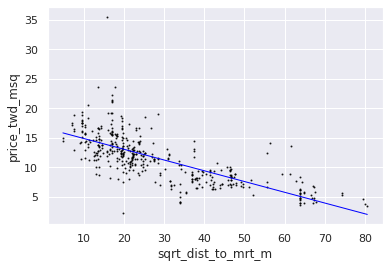

Observations far away from the trend line have high influence, because they have large residuals and are far away from other observations.

The majority of the influential houses were those with prices that were much higher than the model predicted (and one with a price that was much lower).

### ***Extracting leverage and influence***

In the last few exercises, you explored which observations had the highest leverage and influence. Now you'll extract those values from the model.


* Get the summary frame from `mdl_price_vs_dist` and save as `summary_info`.

* Add the `hat_diag` column of `summary_info` to `taiwan_real_estate` as the `leverage` column.

* Sort `taiwan_real_estate` by `leverage` in descending order.

In [ ]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info['hat_diag']
taiwan_real_estate.drop(columns='sqrt_dist_to_mrt_m', inplace=True)
# Sort taiwan_real_estate by leverage in descending order and print the head
display(taiwan_real_estate.sort_values(by='leverage', ascending=False).head())

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,leverage
347,"6,488.021",1,15 to 30,3.389,0.027
116,"6,396.283",1,30 to 45,3.691,0.026
249,"6,306.153",1,15 to 30,4.539,0.026
255,"5,512.038",1,30 to 45,5.265,0.021
8,"5,512.038",1,30 to 45,5.688,0.021


* Add the `cooks_d` column from `summary_info` to taiwan_real_estate as the `cooks_dist` column.
* Sort `taiwan_real_estate` by `cooks_dist` in descending order.

In [ ]:
# Add the cooks_d column to taiwan_real_estate, name it cooks_dist
taiwan_real_estate["cooks_dist"] = summary_info["cooks_d"]

# Sort taiwan_real_estate by cooks_dist in descending order and print the head.
taiwan_real_estate.sort_values(by='cooks_dist', ascending=False).head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,leverage,cooks_dist
270,252.582,1,0 to 15,35.552,0.004,0.116
148,"3,780.590",0,15 to 30,13.646,0.012,0.052
228,"3,171.329",0,0 to 15,14.100,0.009,0.035
220,186.510,9,30 to 45,23.691,0.004,0.025
113,393.261,6,0 to 15,2.300,0.003,0.023


In [17]:
~(22<16)

-1

# **Logistic Regression**

In [6]:
from statsmodels.formula.api import logit

churn = pd.read_csv('churn.csv')
display(churn.sample(5))
print("\n")
churn_logit = logit("has_churned ~ time_since_last_purchase", data=churn).fit()
churn_logit.params

,has_churned,time_since_first_purchase,time_since_last_purchase
147,0,0.072,-0.797
112,0,-0.657,-0.739
332,1,1.945,5.032
307,1,-0.413,0.709
369,1,0.127,0.321




Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4


,0
Intercept,-0.035
time_since_last_purchase,0.269


# **Visualizing the logistic model**

In [22]:
c = ols("has_churned ~ time_since_last_purchase", data=churn).fit()
c.params
intercept, slope = c.params

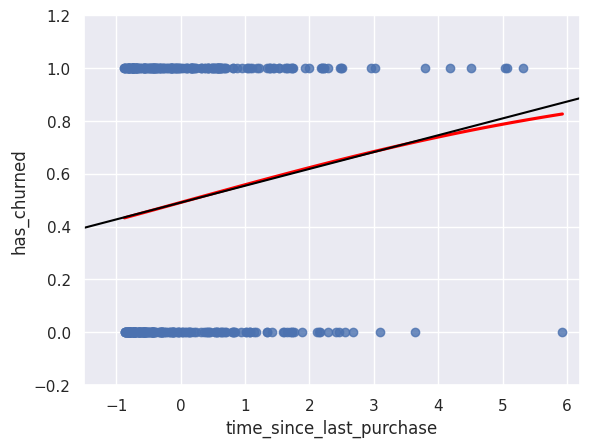

In [24]:
#intercept, slope = churn_logit.params
sns.regplot(x="time_since_last_purchase", y="has_churned", data=churn, ci=None, logistic=True, line_kws={'color':'red'})
plt.axline(xy1=(0,intercept), slope=slope, color="black")
plt.xlim(-1.5,6.2)
plt.ylim(-0.2,1.2)
plt.show()

The logistic regression line (red) is slightly curved.

Note that `sns.regplot(logistic=True)` cannot draw the whole logistic regression curve without actual data points.  We must use the predict method we did above for `logit` and plot it as follows.

Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4


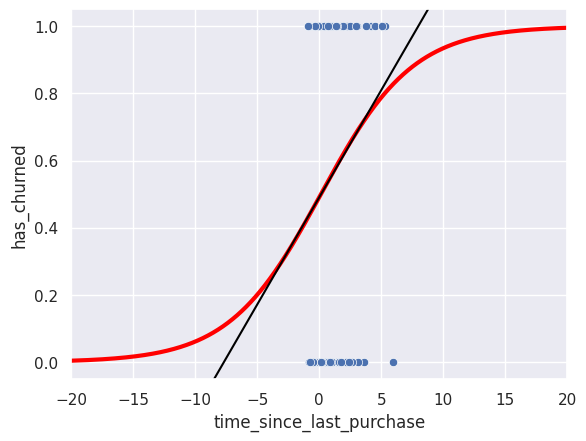

In [8]:
logit_model = logit("has_churned ~ time_since_last_purchase", data=churn).fit()
explanatory_data = pd.DataFrame({"time_since_last_purchase": np.arange(-20, 20, 0.01)})
prediction_data = explanatory_data.assign(has_churned = logit_model.predict(explanatory_data))

plt.plot(prediction_data['time_since_last_purchase'], prediction_data['has_churned'], color='red', linewidth=3)
plt.axline(xy1=(0, intercept), slope=slope, color="black")
sns.scatterplot(x="time_since_last_purchase", y="has_churned", data=churn)
plt.xlim(-20, 20)
plt.ylim(-0.05, 1.05)
plt.show()

### ***Exploring the explanatory variables***

When the response variable is logical, all the points lie on the  and  lines, making it difficult to see what is happening. Until you saw the trend line, it wasn't clear how the explanatory variable was distributed on each line. This can be solved with a histogram of the explanatory variable, grouped by the response.

You will use these histograms to get to know the financial services churn dataset seen in the video.

* In a **`sns.displot()`** call on the churn data, plot `time_since_last_purchase` as two histograms, split for each `has_churned` value.

* Redraw the histograms using the `time_since_first_purchase` column, split for each `has_churned` value.

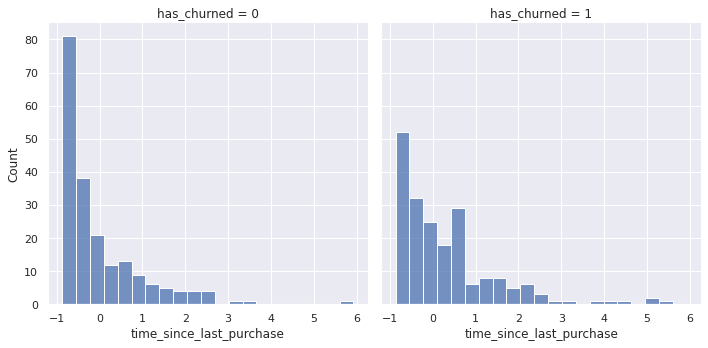

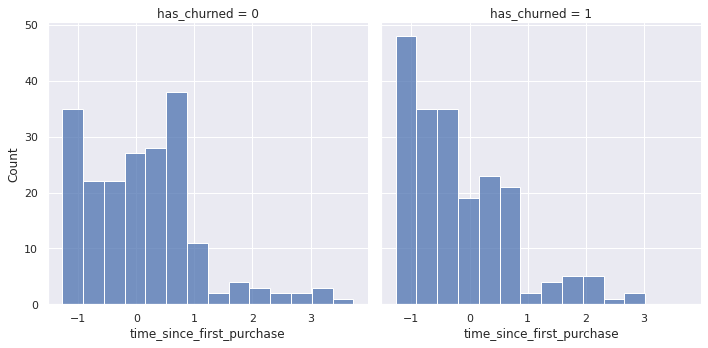

In [ ]:
# Create the histograms of time_since_last_purchase split by has_churned
sns.displot(data=churn, x='time_since_last_purchase', col='has_churned')

plt.show()

sns.displot(data=churn, x='time_since_first_purchase', col='has_churned')

plt.show()

In the `time_since_last_purchase` plot, the distribution of churned customers was further right than the distribution of non-churned customers (churners typically have longer times since their last purchase). For `time_since_first_purchase` the opposite is true: churners have a shorter length of relationship.

### ***Visualizing linear and logistic models***

As with linear regressions, **`regplot()`** will draw model predictions for a logistic regression without you having to worry about the modeling code yourself. To see how the predictions differ for linear and logistic regressions, try drawing both trend lines side by side. Spoiler: you should see a linear (straight line) trend from the linear model, and a logistic (S-shaped) trend from the logistic model.

* Using `churn`, plot `has_churned` versus `time_since_first_purchase` as a scatter plot with a red linear regression trend line.

* Using `churn`, plot `has_churned` versus `time_since_first_purchase` as a scatter plot with a blue logistic regression trend line.

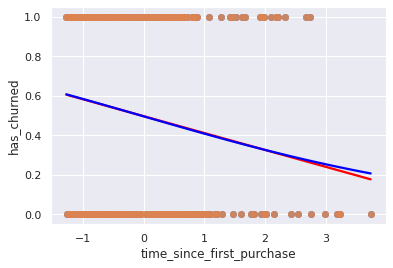

In [ ]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase", y="has_churned", data=churn, ci=None,
            line_kws={"color": "red"})

# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase", y="has_churned", data=churn, ci=None,
            line_kws={"color": "blue"}, logistic=True)

plt.show()

The two models give similar predictions in some places, but notice the slight curve in the logistic model trend.

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4


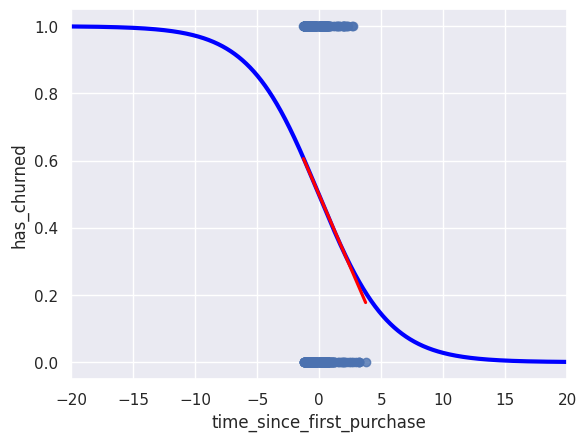

In [9]:
logit_model = logit("has_churned ~ time_since_first_purchase", data=churn).fit()
explanatory_data = pd.DataFrame({"time_since_first_purchase": np.arange(-20, 20, 0.01)})
prediction_data = explanatory_data.assign(has_churned = logit_model.predict(explanatory_data))

plt.plot(prediction_data['time_since_first_purchase'], prediction_data['has_churned'], color='blue', linewidth=3)
sns.regplot(x="time_since_first_purchase", y="has_churned", data=churn, ci=None, line_kws={"color": "red"})
plt.xlim(-20, 20)
plt.ylim(-0.05, 1.05)
plt.show()



### ***Logistic regression with logit()***

Logistic regression requires another function from **`statsmodels.formula.api`**: **`logit()`**. It takes the same arguments as **`ols()`**: a formula and **`data`** argument. You then use **`.fit()`** to fit the model to the data.

Here, you'll model how the length of relationship with a customer affects churn.

* Fit a logistic regression of `has_churned` versus `time_since_first_purchase` using the `churn` dataset. Assign to `mdl_churn_vs_relationship`.


In [ ]:
# Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn vs. length of relationship using the churn dataset
mdl_churn_vs_relationship = logit('has_churned ~ time_since_first_purchase', data=churn).fit()

# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
Intercept                   -0.015
time_since_first_purchase   -0.355
dtype: float64


# **Making predictions**

Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4


,time_since_last_purchase,prob_has_churned
3,-0.250,0.474
0,-1.000,0.425
8,1.000,0.558
10,1.500,0.591
16,3.000,0.684


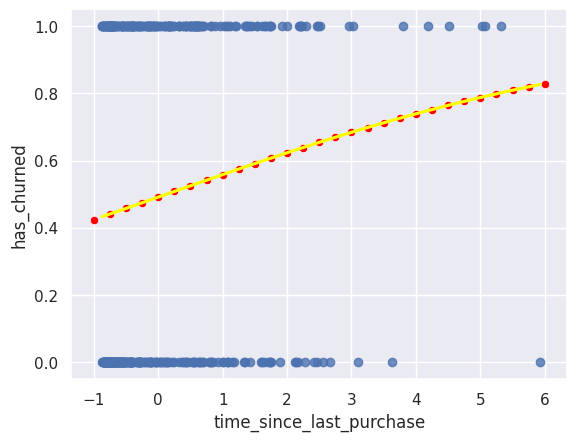

In [4]:
churn = pd.read_csv('churn.csv')

mdl_recency = logit("has_churned ~ time_since_last_purchase", data = churn).fit()

explanatory_data = pd.DataFrame({"time_since_last_purchase": np.arange(-1, 6.25, 0.25)})
prediction_data = explanatory_data.assign(prob_has_churned=mdl_recency.predict(explanatory_data))

display(prediction_data.sample(5))
print('\n')

sns.regplot(x="time_since_last_purchase", y="has_churned", data=churn, ci=None, logistic=True, line_kws={'color':'yellow'})
sns.scatterplot(x="time_since_last_purchase", y="prob_has_churned", data=prediction_data, color="red")
plt.show()

# **Getting the most likely outcome (Threshold Probability = 0.5)**

- If the probability of churning is <u>less than 0.5</u>, the most likely outcome is that they will not churn.

,time_since_last_purchase,has_churned,most_likely_outcome
20,4.000,0.739,1.000
12,2.000,0.623,1.000
0,-1.000,0.425,0.000
10,1.500,0.591,1.000
21,4.250,0.752,1.000
26,5.500,0.809,1.000
22,4.500,0.764,1.000
11,1.750,0.607,1.000


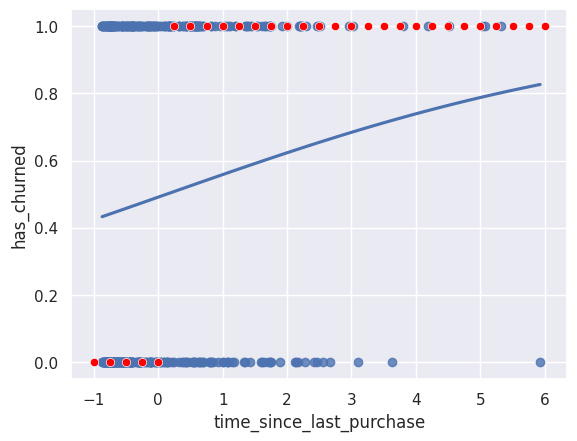

In [6]:
prediction_data = explanatory_data.assign(has_churned = mdl_recency.predict(explanatory_data))
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])
display(prediction_data.sample(8))
print('\n')
sns.regplot(x="time_since_last_purchase", y="has_churned", data=churn, ci=None, logistic=True)
sns.scatterplot(x="time_since_last_purchase", y="most_likely_outcome", data=prediction_data, color="red")
plt.show()

# **Odds ratios**

***Odds ratio*** is the probability of something happening divided by the probability that it doesn't.

$$\text{odds ratio} = \frac{\text{probability}}{1-\text{probability}}$$

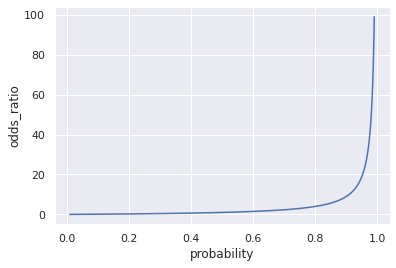

In [ ]:
plt.plot(np.linspace(0.01, 0.99, 1000), np.linspace(0.01, 0.99, 1000)/(1-np.linspace(0.01, 0.99, 1000)))
plt.xlabel('probability')
plt.ylabel('odds_ratio')
plt.show()

## **Calculating odds ratio**

In [8]:
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])
prediction_data.head(10)

,time_since_last_purchase,has_churned,most_likely_outcome,odds_ratio
0,-1.000,0.425,0,0.738
1,-0.750,0.441,0,0.789
2,-0.500,0.458,0,0.844
3,-0.250,0.474,0,0.903
4,0.000,0.491,0,0.966
5,0.250,0.508,1,1.033
6,0.500,0.525,1,1.105
7,0.750,0.542,1,1.182
8,1.000,0.558,1,1.264
9,1.250,0.575,1,1.352


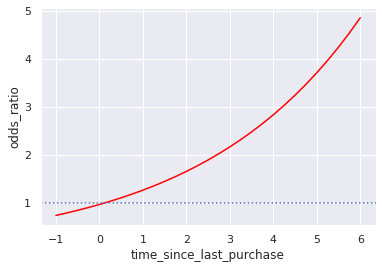

In [ ]:
sns.lineplot(x="time_since_last_purchase", y="odds_ratio", data=prediction_data, color='red')
plt.axhline(y=1, linestyle="dotted") # odds ratio = 1 indicates where churning is as likely as not churning.
plt.show()

* ถ้า odds ratio = 1 ก็หมายความว่า ความน่าจะเป็นที่จะเกิด มีค่าพอๆกันกับความน่าจะเป็นที่จะไม่เกิด นั่นคือ prob(happens) = 0.5 = prob(not happen)

* In the bottom left of the graph, the predictions are below 1, so the chance of churning is less than the chance of not churning.

* In the top right, the chance of churning is 5 times more than the chance of not churning.

# **Visualizing log odds ratio**

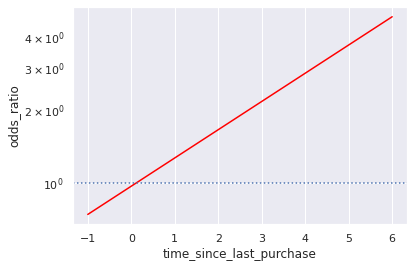

In [ ]:
sns.lineplot(x="time_since_last_purchase", y="odds_ratio", data=prediction_data, color='red')
plt.axhline(y=1, linestyle="dotted")

plt.yscale("log")

plt.show()

# **Calculating log odds ratio**

In [11]:
prediction_data['most_likely_outcome'] = prediction_data['most_likely_outcome'].astype(int)
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])
df = prediction_data[prediction_data['time_since_last_purchase']%2 == 0] # เลือกออกมาเฉพาะแถวที่ time_since_last_purchase หารสองลงตัว
df['time_since_last_purchase'] = df['time_since_last_purchase'].astype(int)
df

,time_since_last_purchase,has_churned,most_likely_outcome,odds_ratio,log_odds_ratio
4,0,0.491,0,0.966,-0.035
12,2,0.623,1,1.654,0.503
20,4,0.739,1,2.834,1.042
28,6,0.829,1,4.856,1.580


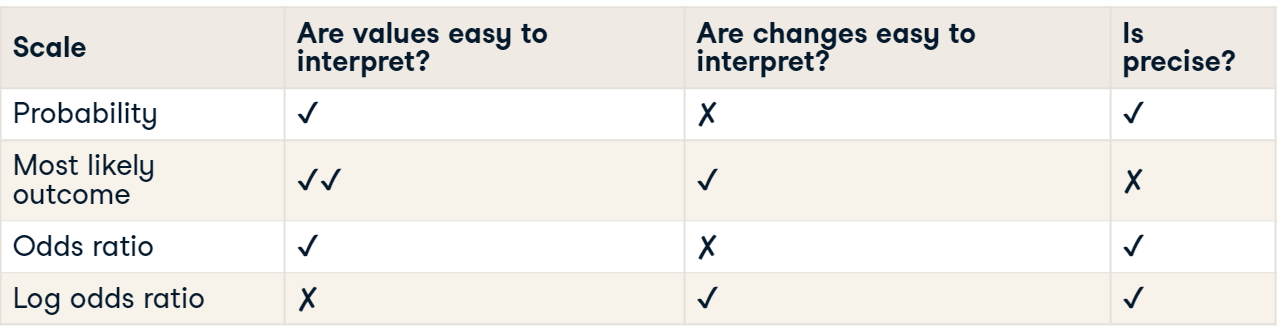

### ***Probabilities***

There are four main ways of expressing the prediction from a logistic regression model – we'll look at each of them over the next four exercises. Firstly, since the response variable is either "yes" or "no", you can make a prediction of the probability of a "yes". Here, you'll calculate and visualize these probabilities.

Two variables are available:

   * `mdl_churn_vs_relationship` is the fitted logistic regression model of `has_churned` versus `time_since_first_purchase`.

   * explanatory_data is a DataFrame of explanatory values.

1. Create a DataFrame, `prediction_data`, by assigning a column `has_churned` to `explanatory_data`.

2. In the `has_churned` column, store the predictions of the probability of churning: use the model, `mdl_churn_vs_relationship`, and the explanatory data, `explanatory_data`.

3. Create a scatter plot with a logistic trend line of `has_churned` versus `time_since_first_purchase`.

4. Overlay the plot with the points from `prediction_data`, colored red.

In [ ]:
mdl_churn_vs_relationship = logit('has_churned ~ time_since_first_purchase', data=churn).fit()
explanatory_data = pd.DataFrame({'time_since_first_purchase':np.arange(-1.5, 4.01, 0.25)})
# Create prediction_data
prediction_data = explanatory_data.assign(has_churned=mdl_churn_vs_relationship.predict(explanatory_data))
display(prediction_data.head())

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4


,time_since_first_purchase,has_churned
0,-1.500,0.626
1,-1.250,0.605
2,-1.000,0.584
3,-0.750,0.562
4,-0.500,0.540


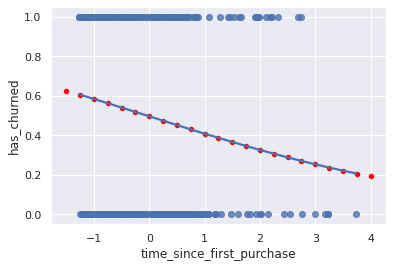

In [ ]:
# Create prediction_data
prediction_data = explanatory_data.assign(
    has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)

fig = plt.figure()

# Create a scatter plot with logistic trend line
sns.regplot(x='time_since_first_purchase', y='has_churned', data=churn, ci=None, logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x='time_since_first_purchase', y='has_churned', data=prediction_data, color='red')

plt.show()

The probability of a positive response is a natural way of thinking about predictions.

### **Most likely outcome**

When explaining your results to a non-technical audience, you may wish to side-step talking about probabilities and simply explain the most likely outcome. That is, *rather than saying there is a 60% chance of a customer churning, you say that the most likely outcome is that the customer will churn.* The trade-off here is easier interpretation at the cost of nuance.

* Update `prediction_data` to add a column of the most likely churn outcome, `most_likely_outcome`.


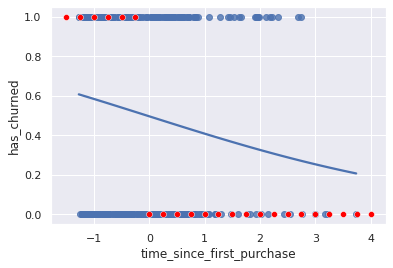

In [ ]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

fig = plt.figure()

# Create a scatter plot with logistic trend line (from previous exercise)
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x="time_since_first_purchase",y="most_likely_outcome",data=prediction_data,color='red')

plt.show()

Providing the most likely response is a great way to share the model results with a non-technical audience.

### ***Odds ratio***

Odds ratios compare the probability of something happening with the probability of it not happening. This is sometimes easier to reason about than probabilities, particularly when you want to make decisions about choices. For example, if a customer has a 20% chance of churning, it may be more intuitive to say "the chance of them not churning is four times higher than the chance of them churning".

* Update `prediction_data` to add a column, `odds_ratio`, of the odds ratios.


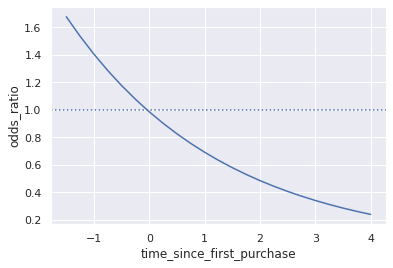

In [ ]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

fig = plt.figure()

# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(x='time_since_first_purchase', y='odds_ratio', data=prediction_data)

# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted")

plt.show()

Odds ratios provide an alternative to probabilities that make it easier to compare positive and negative responses.

### ***Log odds ratio***

One downside to probabilities and odds ratios for logistic regression predictions is that the prediction lines for each are curved. This makes it harder to reason about what happens to the prediction when you make a change to the explanatory variable. The logarithm of the odds ratio (the "log odds ratio" or "logit") does have a linear relationship between predicted response and explanatory variable. That means that as the explanatory variable changes, you don't see dramatic changes in the response metric - only linear changes.

Since the actual values of log odds ratio are less intuitive than (linear) odds ratio, for visualization purposes ***it's usually better to plot the odds ratio and apply a log transformation to the y-axis scale.***

* Update `prediction_data` to add a `log_odds_ratio` column derived from `odds_ratio`.


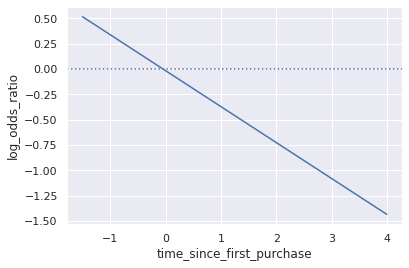

In [ ]:
# Update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

fig = plt.figure()

# Update the line plot: log_odds_ratio vs. time_since_first_purchase
sns.lineplot(x="time_since_first_purchase",
             y="log_odds_ratio",
             data=prediction_data)

# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")
plt.show()

The linear relationship between predicted log odds ratio and the explanatory variable makes changes easier to reason about.

# **Confusion Matrix**

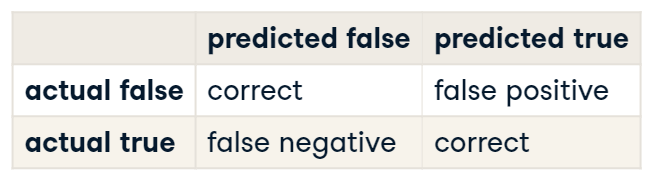

- **True** = churn
  - **False positive**: Predict churn but in fact not churn
  - **False negative**: Predict not churn but in fact churn

# **Counts of outcomes**

In [14]:
churn = pd.read_csv('churn.csv')
mdl_recency = logit("has_churned ~ time_since_last_purchase", data=churn).fit()

actual_response = churn["has_churned"]
predicted_response = np.round(mdl_recency.predict())

outcomes = pd.DataFrame({"actual_response": actual_response,
                         "predicted_response": predicted_response})
display(outcomes.head())
print("\n")
outcomes.value_counts(sort=False)

Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4


,actual_response,predicted_response
0,0,0.000
1,0,1.000
2,0,0.000
3,0,0.000
4,0,0.000


actual_response  predicted_response
0                0.000                 141
                 1.000                  59
1                0.000                 111
                 1.000                  89
Name: count, dtype: int64

# **Visualizing the confusion matrix**

In [ ]:
mdl_recency.pred_table()

array([[141.,  59.],
       [111.,  89.]])

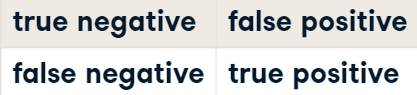

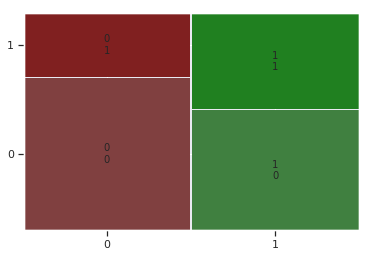

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(mdl_recency.pred_table())
plt.show()

# **Accuracy**

Accuracy is the proportion of correct predictions.

$$accuracy = \frac{TN + TP}{TN + FN + FP + TP}$$

In [ ]:
TN = mdl_recency.pred_table()[0,0]
TP = mdl_recency.pred_table()[1,1]
FN = mdl_recency.pred_table()[1,0]
FP = mdl_recency.pred_table()[0,1]

# **Sensitivity** ตัวเดียวกันกับ Recall ?

* สัดส่วนของ True positives
  - ในบรรดาที่ค่าของจริงคือ `True` มีสัดส่วนที่ทำนายถูกเท่าไหร่

      - ทำนายถูก คือ TP
      - ทำนายผิด คือ FN

* ยิ่งค่าสูงยิ่งดี

$$\text{Sensitivity} = \frac{TP}{FN + TP}$$

In [ ]:
TP / (FN + TP)

0.445

# **Specificity**

* สัดส่วนของ True Negatives
  - ในบรรดาค่าทีของจริงคือ `False` มีที่ False จริงๆ เป็นสัดส่วนเท่าไหร่
      - TN คือ ทำนายว่า False ถูก
      - FP คือ ทำนายว่า False ผิด
* ยิ่งสูงยิ่งดี
* ถ้า specificity สูงขึ้น จะทำให้ sensitivity ลดลง

In [ ]:
TN / (TN + FP)

0.705

### **Calculating the confusion matrix**

A confusion matrix is the basis of all performance metrics for models with a categorical response (such as a logistic regression). It contains the counts of each actual response-predicted response pair. In this case, where there are two possible responses (churn or not churn), there are four overall outcomes.

1. **True positive**: The customer churned and the model predicted they would.
2. **False positive**: The customer didn't churn, but the model predicted they would.
3. **True negative**: The customer didn't churn and the model predicted they wouldn't.
4. **False negative**: The customer churned, but the model predicted they wouldn't.


* Get the actual responses by subsetting the `has_churned` column of the dataset. Assign to `actual_response`.
* Get the "most likely" predicted responses from the model. Assign to `predicted_response`.
* Create a DataFrame from `actual_response` and `predicted_response`. Assign to outcomes.
* Print outcomes as a table of counts, representing the confusion matrix.

In [ ]:
churn = pd.read_csv('churn.csv')
mdl_churn_vs_relationship = logit('has_churned ~ time_since_first_purchase', data=churn).fit()

# Get the actual responses
actual_response = churn['has_churned']

# Get the predicted responses
predicted_response = np.round(mdl_churn_vs_relationship.predict())

# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame({'actual_response':actual_response, 'predicted_response': predicted_response})

# Print the outcomes
print(outcomes.value_counts(sort=False))

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
actual_response  predicted_response
0                0.000                 112
                 1.000                  88
1                0.000                  76
                 1.000                 124
dtype: int64


### ***Drawing a mosaic plot of the confusion matrix***

While calculating the performance matrix might be fun, it would become tedious if you needed multiple confusion matrices of different models. Luckily, the **`.pred_table()`** method can calculate the confusion matrix for you.

Additionally, you can use the output from the **`.pred_table()`** method to visualize the confusion matrix, using the **`mosaic()`** function.

* Create `conf_matrix` using the **`.pred_table()`** method and print it.
* Draw a mosaic plot of the confusion matrix.

[[112.  88.]
 [ 76. 124.]]


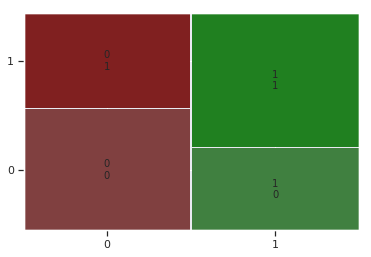

In [ ]:
# Import mosaic from statsmodels.graphics.mosaicplot
from statsmodels.graphics.mosaicplot import mosaic

# Calculate the confusion matrix conf_matrix
conf_matrix = mdl_churn_vs_relationship.pred_table()

# Print it
print(conf_matrix)

# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()

### ***Measuring logistic model performance***

* Extract the number of true positives (`TP`), true negatives (`TN`), false positives (`FP`), and false negatives (`FN`) from `conf_matrix`.
* Calculate the `accuracy` of the model.
* Calculate the `sensitivity` of the model.
* Calculate the `specificity` of the model.

In [ ]:
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0, 0]
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]
FP = conf_matrix[0, 1]

# Calculate and print the accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
print("accuracy: ", accuracy)

# Calculate and print the sensitivity
sensitivity = TP / (FN + TP)
print("sensitivity: ", sensitivity)

# Calculate and print the specificity
specificity = TN / (TN + FP)
print("specificity: ", specificity)

accuracy:  0.59
sensitivity:  0.62
specificity:  0.56


Using these metrics, it becomes much easier to interpret and compare logistic regression models.
